## Problem Statement:
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br><br>
- For many incumbent operators, retaining high profitable customers is the number one business goal.<br><br>
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.<br><br>
- In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

# Step 1 Reading the data

In [1]:
# Import Required Librarues
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels as sm
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
pd.set_option('max_columns',500)
pd.set_option('max_rows',200)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data in data variable
data=pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#statstical description of the data
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
# Shape of the data
data.shape

(99999, 226)

**Insights and Observations**
- 1 lakh rows and 226 columns
- Some columns just have 0 values eg: loc_og_t2o_mou which can be removed while cleaning the data
- Some columns like total recharge data have lowest value as 1 - the null values could mean that the customer did not recharge and can be imputed with 0

# Step 2 Cleaning the data

## Null value check and treatment

In [6]:
data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

**Observations**

In the recharge variables where min value is 1, we can impute missing values with 0 since it shows customer didn't recharge in that month

In [7]:
# create a list of recharge columns where we will impute missing values with zeroes
z_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

# impute missing values with 0
data[z_impute] = data[z_impute].apply(lambda x: x.fillna(0))

In [8]:
# let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(data[z_impute].isnull().sum()*100/data.shape[1])

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [9]:
# null values greater than 30percent
nullperce=data.isnull().sum()/data.shape[0]
nullgreaterthan30=nullperce[nullperce>0.3]
nullgreaterthan30

date_of_last_rech_data_6    0.748467
date_of_last_rech_data_7    0.744287
date_of_last_rech_data_8    0.736607
date_of_last_rech_data_9    0.740777
count_rech_2g_6             0.748467
count_rech_2g_7             0.744287
count_rech_2g_8             0.736607
count_rech_2g_9             0.740777
count_rech_3g_6             0.748467
count_rech_3g_7             0.744287
count_rech_3g_8             0.736607
count_rech_3g_9             0.740777
arpu_3g_6                   0.748467
arpu_3g_7                   0.744287
arpu_3g_8                   0.736607
arpu_3g_9                   0.740777
arpu_2g_6                   0.748467
arpu_2g_7                   0.744287
arpu_2g_8                   0.736607
arpu_2g_9                   0.740777
night_pck_user_6            0.748467
night_pck_user_7            0.744287
night_pck_user_8            0.736607
night_pck_user_9            0.740777
fb_user_6                   0.748467
fb_user_7                   0.744287
fb_user_8                   0.736607
f

In [10]:
print(nullgreaterthan30)

date_of_last_rech_data_6    0.748467
date_of_last_rech_data_7    0.744287
date_of_last_rech_data_8    0.736607
date_of_last_rech_data_9    0.740777
count_rech_2g_6             0.748467
count_rech_2g_7             0.744287
count_rech_2g_8             0.736607
count_rech_2g_9             0.740777
count_rech_3g_6             0.748467
count_rech_3g_7             0.744287
count_rech_3g_8             0.736607
count_rech_3g_9             0.740777
arpu_3g_6                   0.748467
arpu_3g_7                   0.744287
arpu_3g_8                   0.736607
arpu_3g_9                   0.740777
arpu_2g_6                   0.748467
arpu_2g_7                   0.744287
arpu_2g_8                   0.736607
arpu_2g_9                   0.740777
night_pck_user_6            0.748467
night_pck_user_7            0.744287
night_pck_user_8            0.736607
night_pck_user_9            0.740777
fb_user_6                   0.748467
fb_user_7                   0.744287
fb_user_8                   0.736607
f

## Insights:
- We could see that we have 40 features where null value count is greater than30 percent.
- We are dropping these features now and we will consider only remaining features since these values may lead to bias and null value percentage less than 30 are treated in further steps

In [11]:
#null vlaues less than 30 are considereed for further analysis
nulllessthan30=nullperce[nullperce<=0.3]
nulllessthan30

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.010180
std_og_t2o_mou          0.010180
loc_ic_t2o_mou          0.010180
last_date_of_month_6    0.000000
last_date_of_month_7    0.006010
last_date_of_month_8    0.011000
last_date_of_month_9    0.016590
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             0.039370
onnet_mou_7             0.038590
onnet_mou_8             0.053781
onnet_mou_9             0.077451
offnet_mou_6            0.039370
offnet_mou_7            0.038590
offnet_mou_8            0.053781
offnet_mou_9            0.077451
roam_ic_mou_6           0.039370
roam_ic_mou_7           0.038590
roam_ic_mou_8           0.053781
roam_ic_mou_9           0.077451
roam_og_mou_6           0.039370
roam_og_mou_7           0.038590
roam_og_mou_8           0.053781
roam_og_mou_9           0.077451
loc_og_t2t_mou_6        0.039370
loc_og_t2t

In [12]:
data2=data[nulllessthan30.index]
data2.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0

## Insights:
- In the above two columns we have performed null value check percentage and created a new dataframe `data2` which holds our new dataframe,In which null value peercentage of features is less than 30.

In [13]:
# Finding the number of columns having 2 & less than 2 unique values
remcol = []
for col in list(data2.columns):
    uniqueValues = data2[col].unique()
    if len(uniqueValues) < 3:
        remcol.append(col)
remcol

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

## Insights:
- As shown above we are removing the above specified columns/features ,since each feature is saying same information to the dataset which will not help us,So we are removing from further analysis.
- As an exmaple`circle_id` in this dataset is same for entire data.so considering these type of data may affet the peerfomance of the model.

## Removing columns having very less variance

In [14]:
# Mobile number is not a useful feature and thus it makes sense to remove it along with zero variance columns

remcol.append('mobile_number')
print(remcol)
print("Before removing the columns shape of df {}".format(data2.shape))

for col in remcol:
    data2=data2.drop(col,axis=1)

print("After removing the columns shape of df {}".format(data2.shape))

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'mobile_number']
Before removing the columns shape of df (99999, 198)
After removing the columns shape of df (99999, 181)


In [15]:
data2.shape

(99999, 181)

## Treating the null values
- Lets validate the existing columns to fix the null values 

In [16]:
# Columns having less than 30% null values
null_values = data2.isnull().sum()
list_null_col = list(null_values[data2.isnull().sum()>0].index)

In [17]:
# Since we are not doing time series forecasting all the date columns can be removed

df_date = data2.select_dtypes(exclude=['float64','int64'])

print("Before removing the date columns shape of df {}".format(data2.shape))

for col in df_date.columns:
    data2=data2.drop(col,axis=1)

print("After removing the date columns shape of df {}".format(data2.shape))

Before removing the date columns shape of df (99999, 181)
After removing the date columns shape of df (99999, 177)


In [18]:
# fill the na values with mean vlaues
data2.fillna(data2.mean(),inplace=True)

In [19]:
# Filling the rest of null values with mean as all of them are numerical variables
data2.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

In [20]:
data2.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.0,8.063003,0.854656,1.01296,0.0,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.56000,7.68,18.340000,11.510000,75.94000

In [21]:
data2.shape

(99999, 177)

## Filtering High value customers
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [22]:
#Take average recharge amount in the month of 6 and 7 adn store in a new clumn called avergae_rech_amt_6_7

data2['average_rech_amt_6_7']=(data2['total_rech_amt_6']+data2['total_rech_amt_7'])/2

In [23]:
#check the quantile values since we will consider the value abve 70 percentile as high value customers
np.quantile(data2['average_rech_amt_6_7'],[0,0.5,0.7,1])

array([    0. ,   229. ,   368.5, 37762.5])

**Insights**:
- As we could see value of ~390 is the 70th percentile value

In [24]:
data3=data2[data2['average_rech_amt_6_7']>=368.5]
data3.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_7
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,130.302327,453.43,567.16,325.91,190.337222,16.23,33.49,31.64,6.343841,23.74,12.59,38.06,8.555519,51.39,31.38,40.28,44.584446,308.63,447.38,162.28,90.463192,62.13,55.14,53.23,3.655123,0.0,0.0,0.00,1.232726,422.16,533.91,255.79,138.70997,4.30,23.29,12.01,82.342919,49.89,31.76,49.14,86.276622,6.66,20.08,16.68,1.042362,60.86,75.14,77.84,169.664466,0.0,0.18,10.01,0.723892,4.50,0.00,6.50,4.412767,0.00,0.0,0.0,0.047456,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.281794,217.56,221.49,121.19,106.155471,152.16,101.46,39.53,12.173105,427.88,355.23,188.04,164.619293,36.89,11.83,30.39,9.432479,91.44,126.99,141.33,19.620913,52.19,34.24,22.21,2.173419,180.54,173.08,193.94,31.229344,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.163137,2.06,14.53,31.59,8.063003,15.74,15.19,15.14,1.017162,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000,0.00,0.00,0.00,0.000000,0.0,0.0,7.15,0.000000,378.09,288.18,63.04,60.71000,116.56,133.43,22.58,7.330000,13.69,10.04,75.69,74.130000,0.00,0.00,0.00,0.000000,130.2

In [25]:
data3.shape

(30011, 178)

## Insights:
- Now we are having 30011 rows of data, Which was formed after considering only high vlaue customers.
- Lets continue our analysis with this data

## Identify churners where any of the following fields are 0
- `total_ic_mou_9`
- `total_og_mou_9`
- `vol_2g_mb_9`
- `vol_3g_mb_9`

In [26]:
data3['total_ic_mou_9'].head()

7       0.00
8      34.91
13    631.86
16    334.56
17     87.13
Name: total_ic_mou_9, dtype: float64

In [27]:
data3['total_og_mou_9'].head()

7       0.00
8     142.18
13    446.09
16    255.74
17    631.08
Name: total_og_mou_9, dtype: float64

In [28]:
data3['vol_2g_mb_9'].head()

7     0.0
8     0.0
13    0.0
16    0.0
17    0.0
Name: vol_2g_mb_9, dtype: float64

In [29]:
data3['vol_3g_mb_9'].head()

7     0.0
8     0.0
13    0.0
16    0.0
17    0.0
Name: vol_3g_mb_9, dtype: float64

### Now when all of the above fields are 0 then we can tag them as churners

In [30]:
data3['churn']=((data3['total_ic_mou_9']==0.00) & (data3['total_og_mou_9']==0.00 ) & (data3['vol_2g_mb_9']==0.00) & (data3['vol_3g_mb_9']==0))

In [31]:
data3.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_7,churn
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,130.302327,453.43,567.16,325.91,190.337222,16.23,33.49,31.64,6.343841,23.74,12.59,38.06,8.555519,51.39,31.38,40.28,44.584446,308.63,447.38,162.28,90.463192,62.13,55.14,53.23,3.655123,0.0,0.0,0.00,1.232726,422.16,533.91,255.79,138.70997,4.30,23.29,12.01,82.342919,49.89,31.76,49.14,86.276622,6.66,20.08,16.68,1.042362,60.86,75.14,77.84,169.664466,0.0,0.18,10.01,0.723892,4.50,0.00,6.50,4.412767,0.00,0.0,0.0,0.047456,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.281794,217.56,221.49,121.19,106.155471,152.16,101.46,39.53,12.173105,427.88,355.23,188.04,164.619293,36.89,11.83,30.39,9.432479,91.44,126.99,141.33,19.620913,52.19,34.24,22.21,2.173419,180.54,173.08,193.94,31.229344,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.163137,2.06,14.53,31.59,8.063003,15.74,15.19,15.14,1.017162,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,True
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000,0.00,0.00,0.00,0.000000,0.0,0.0,7.15,0.000000,378.09,288.18,63.04,60.71000,116.56,133.43,22.58,7.330000,13.69,10.04,75.69,74.130000,0.00,0.00,0.00,0.0

In [32]:
# Funcc is reusable method for converting the values of True and False to numericla format indicating churn and nonchurn
def funcc(inp):
    if(inp==False):
        return 0
    else:
        return 1

In [33]:
data3['churn']=data3['churn'].apply(funcc)

In [34]:
temp = data3['churn'].value_counts()
df_1 = pd.DataFrame({'labels': temp.index,'values': temp.values})
df_1.iplot(kind='pie',labels='labels',values='values', title="% Data Imbalance") 

**Insights and Observations**
   - The churn rate of ~8.6% is very small and it would bias the model to the majority class. Thus we need to use class balance techniques like SMOTE on training data before running the model

### Removing the columns having '_9' and sept post preparing churn column

In [35]:
data3.shape

(30011, 179)

In [36]:
listofcolumns2=[]
eliminatecolumns=[]
for i in data3.columns:
    if('_9' in i):
        eliminatecolumns.append(i)
    else:
        listofcolumns2.append(i)

In [37]:
print(len(listofcolumns2))

136


In [38]:
print(len(eliminatecolumns))

43


## Insights:
- As shown above we are removing the columns where we have 9th data in it and we could observe 43 columns can be removed after applying this condition

In [39]:
# As showed above we have removed columns perfectly which are not required for further analysis
data4=data3[listofcolumns2]
data4.shape

(30011, 136)

In [40]:
# Removing variable calculated in Sept 
data4.drop('sep_vbc_3g',axis=1,inplace=True)

## Insights:
- Removing variable calculated in Sept  which is the last month of the data which we are using to make predicions

# Step 3 Visualizing and Deriving variables

In [41]:
# List of columns left in dataset post cleaning
list(data4.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [42]:
# Visualizing the variables through box plot
def pltbox(r,c,columns):
    for i,col in zip(range(1,(r*c)+1),columns):
        plt.subplot(r,c,i)
        sns.boxplot(y = col,x='churn', data = data4, hue='churn',palette=("Set3"),showfliers=False)
        plt.tight_layout(pad=1.0)

In [43]:
#Visualizing the mean across different variable across three months
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.line(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

## Total recharge number and amount

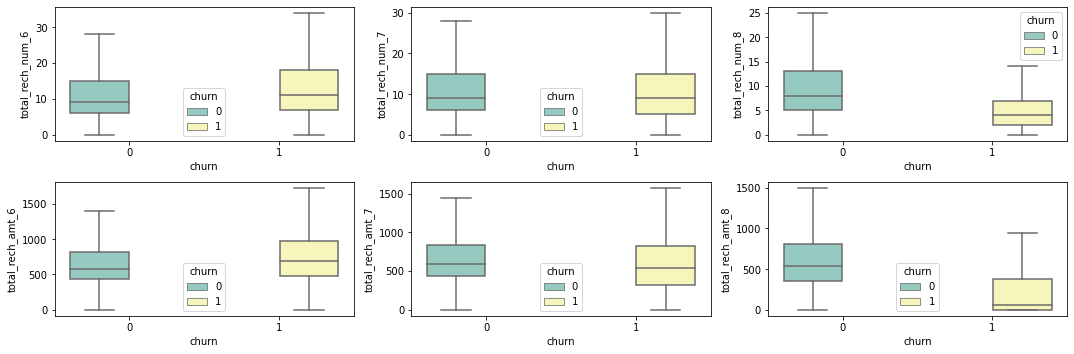

In [44]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

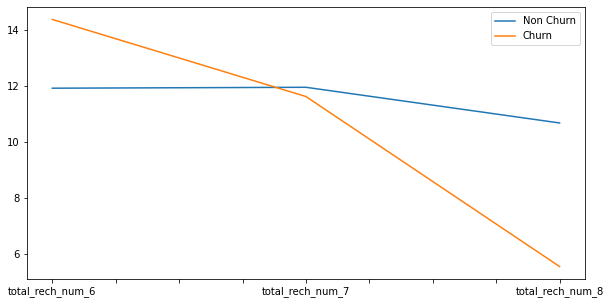

,total_rech_num_6,total_rech_num_7,total_rech_num_8
Non Churn,11.909220,11.941972,10.668247
Churn,14.364057,11.612032,5.541843


In [45]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['total_rech_num_6','total_rech_num_7','total_rech_num_8'])


<Figure size 1080x360 with 0 Axes>

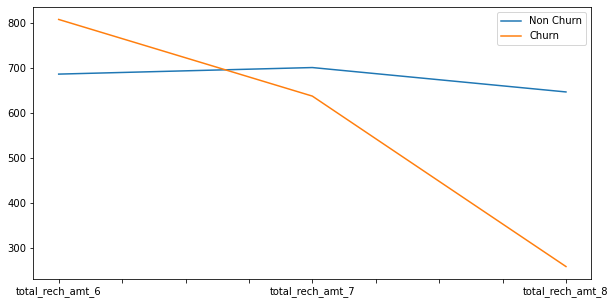

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
Non Churn,686.861113,701.449705,647.192501
Churn,808.441188,637.946008,258.846895


In [46]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'])


**Insights**

The total amount recharge and number drops from June to August for churn users

## Average revenue per user

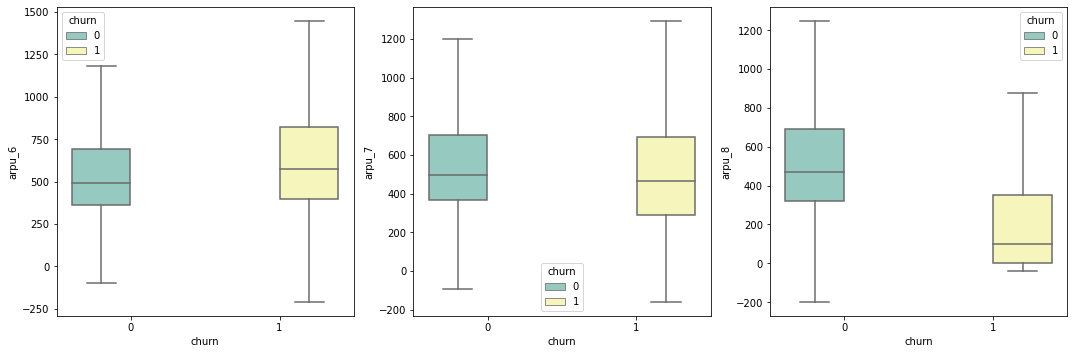

In [47]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(1,3,['arpu_6','arpu_7','arpu_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

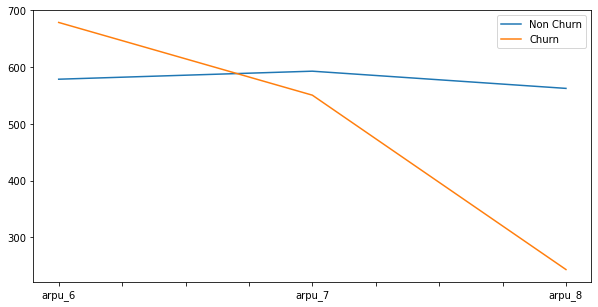

,arpu_6,arpu_7,arpu_8
Non Churn,578.63736,592.788162,562.453248
Churn,678.71697,550.511946,243.063343


In [48]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['arpu_6','arpu_7','arpu_8'])


**Insights**

- There are negative values in these three variables which can be brought to same scale through Standard scaler
- Initially average revenue per user for churn cases is much higher than non churn users but it drops with month and becomes very low in August

## Onnet v.s Offnet calls

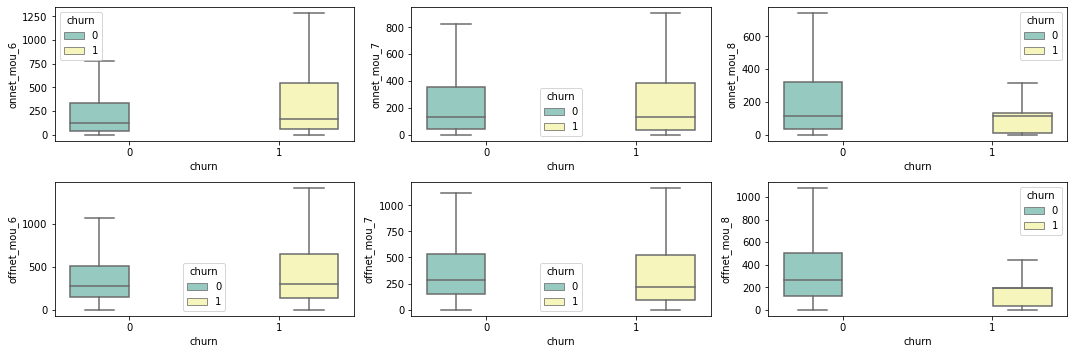

In [49]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

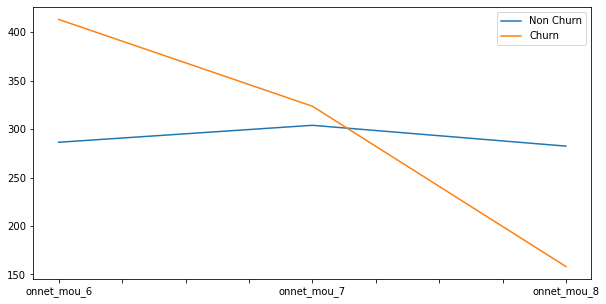

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,286.473387,303.987537,282.498290
Churn,413.266472,323.723836,158.190825


In [50]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['onnet_mou_6','onnet_mou_7','onnet_mou_8'])


<Figure size 1080x360 with 0 Axes>

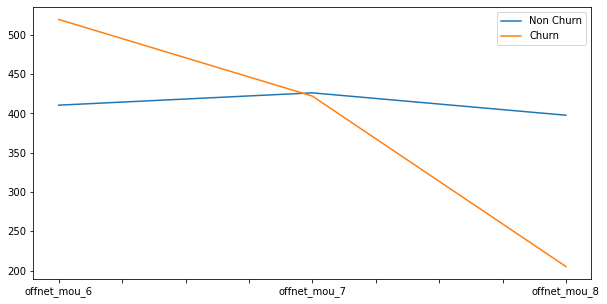

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,410.592694,426.269628,397.801518
Churn,519.674343,422.151352,205.260742


In [51]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['offnet_mou_6','offnet_mou_7','offnet_mou_8'])


**Insights**

The minutes of usage decreses with a higher slope during August for both within network and outside network

## Roaming Incoming v.s Outgoing calls

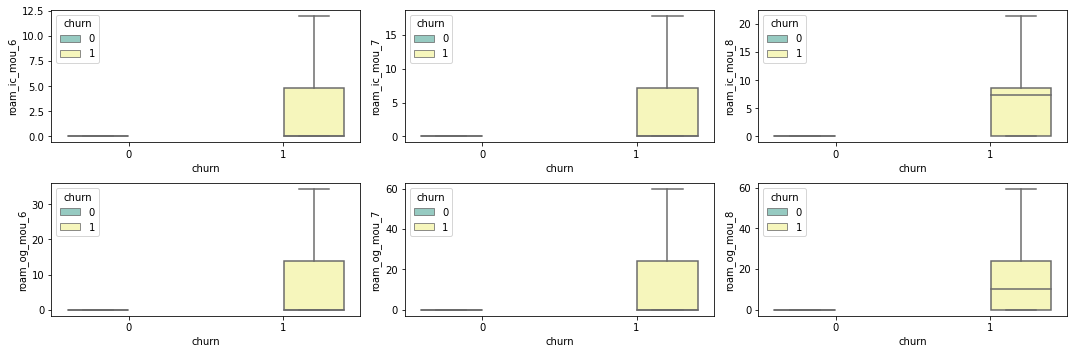

In [52]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

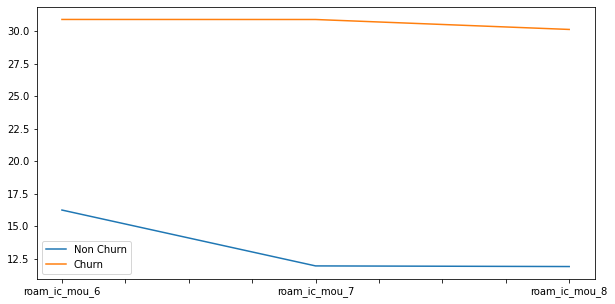

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
Non Churn,16.251861,11.957985,11.909765
Churn,30.900552,30.896465,30.132204


In [53]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'])


<Figure size 1080x360 with 0 Axes>

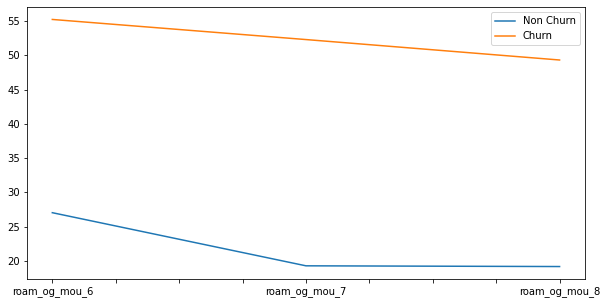

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
Non Churn,27.032764,19.283730,19.178059
Churn,55.219299,52.285487,49.303483


In [54]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'])


**Insights**

The roaming minutes of usage for churned users is much higher compared to non churners. The mean pretty much remains constant throughout the three month time period. This could mean that lot of churners have moved out of state or travel most of the times

## Outgoing calls

### Outgoing calls within network v.s outside network

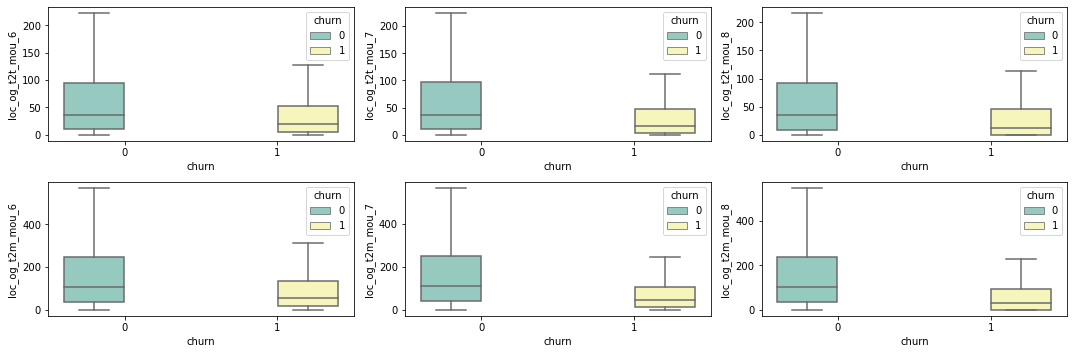

In [55]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

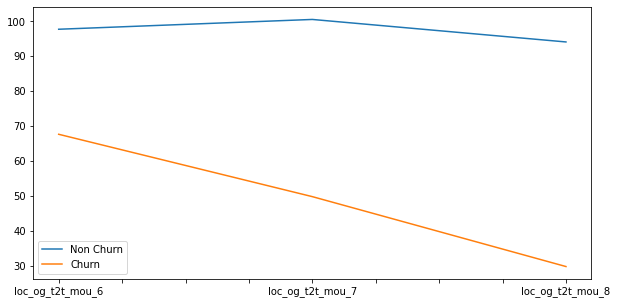

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8
Non Churn,97.778268,100.587795,94.137154
Churn,67.667436,49.791777,29.752663


In [56]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8'])


<Figure size 1080x360 with 0 Axes>

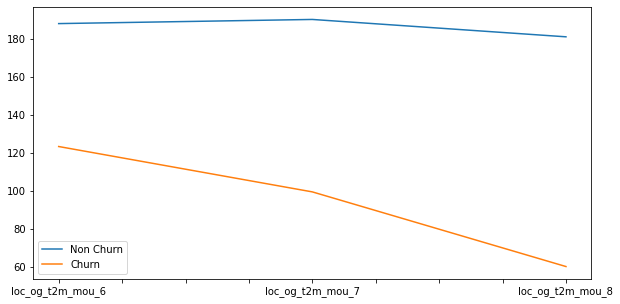

,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8
Non Churn,187.848407,190.030595,180.898821
Churn,123.197093,99.334437,60.070160


In [57]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8'])


**Insights**

Out going calls within network and out side network reduces drastically by August for churned users

### Outgoing calls to fixed lines of T v.s it's own call center

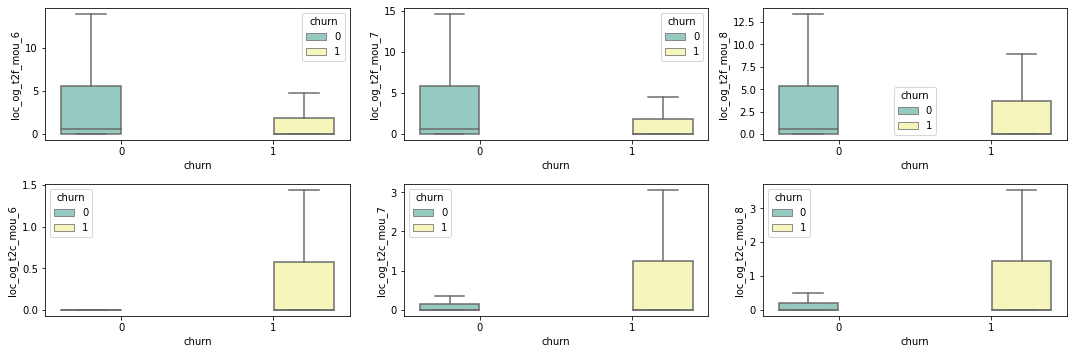

In [58]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

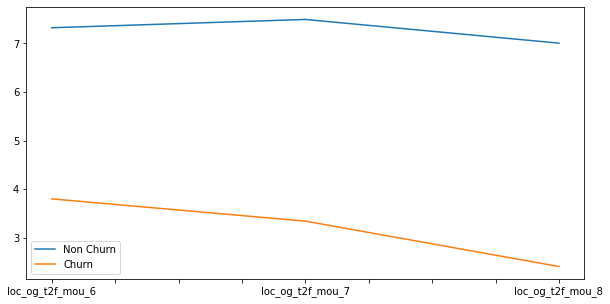

,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8
Non Churn,7.323130,7.494205,7.006534
Churn,3.801164,3.343338,2.408666


In [59]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8'])


<Figure size 1080x360 with 0 Axes>

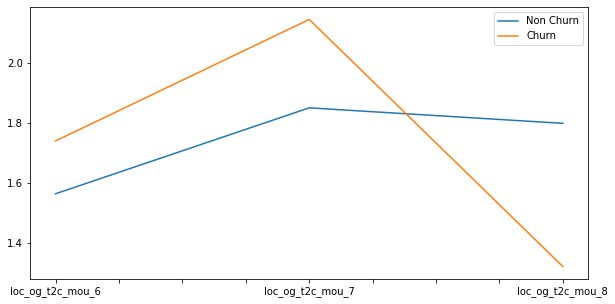

,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8
Non Churn,1.563751,1.850549,1.798859
Churn,1.740063,2.145643,1.320791


In [60]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8'])


**Insights**

Out going calls to network call centre increased drastically in July and then reduced in August for churned users. It could be because the customers weren't happy with the services provided and had decided to leave the network

### Outgoing local calls - within same telecome circle

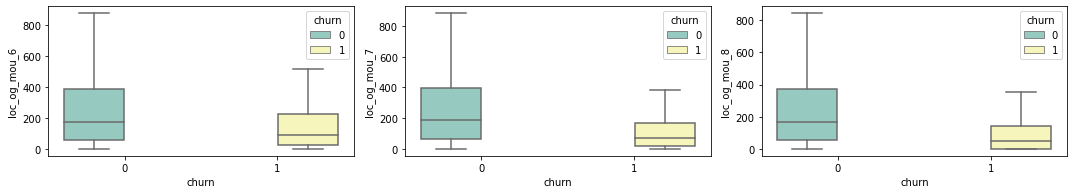

In [61]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

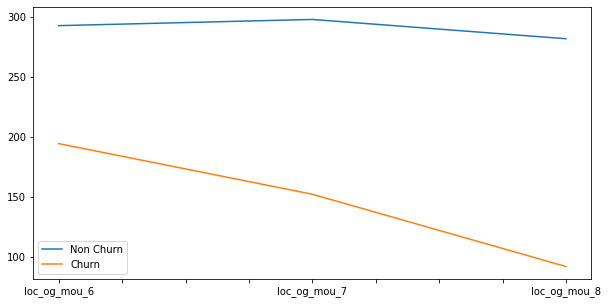

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
Non Churn,292.958814,298.121839,282.051494
Churn,194.673222,152.476477,92.236680


In [62]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8'])


**Insights**

Out going calls within network and out side network reduces drastically by August for churned users

### Outgoing STD calls - within same telecome circle (within n/w outside n/w)

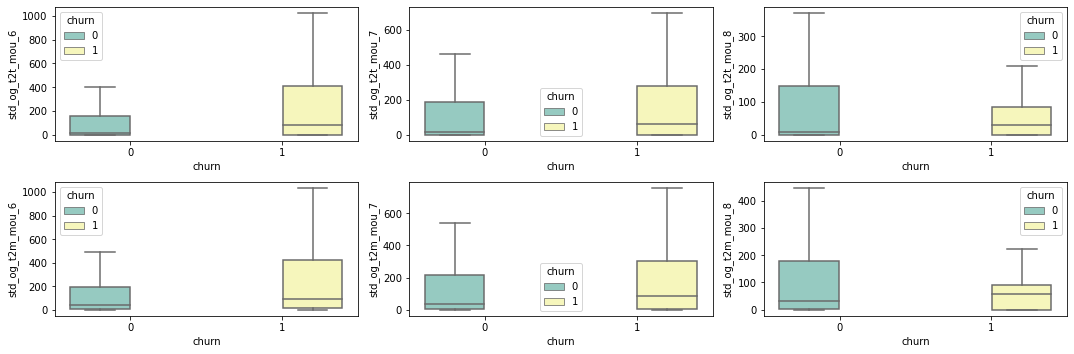

In [63]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

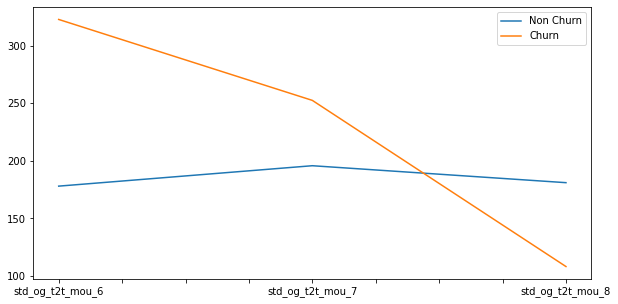

,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8
Non Churn,178.085262,195.815089,181.093212
Churn,322.856049,252.566736,108.249849


In [64]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8'
 ])


<Figure size 1080x360 with 0 Axes>

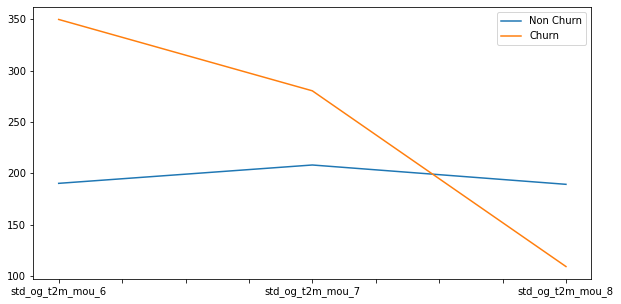

,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8
Non Churn,190.240465,208.093336,189.287233
Churn,349.687891,280.260516,109.305833


In [65]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8'
 ])


**Insights**

STD Out going calls within network and out side network reduces drastically by August for churned users

### Outgoing STD calls 

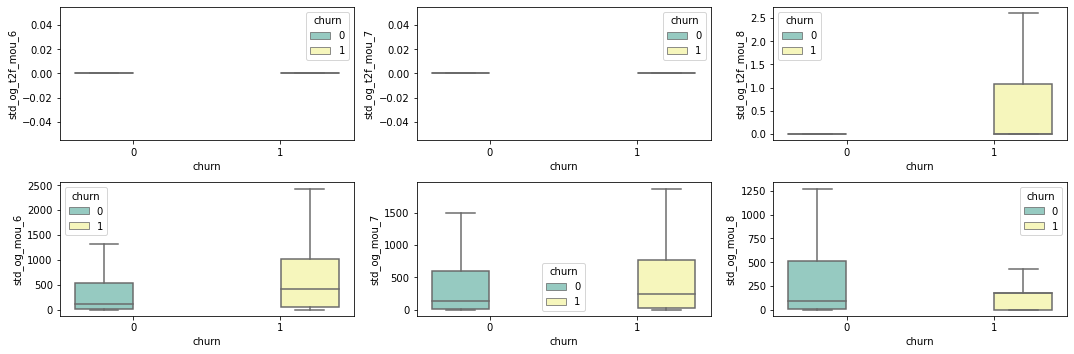

In [66]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 ])
plt.show()

<Figure size 1080x360 with 0 Axes>

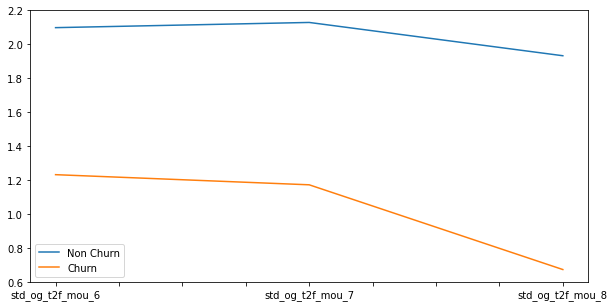

,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8
Non Churn,2.097517,2.128172,1.931973
Churn,1.231063,1.171318,0.671922


In [67]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8'
 ])


<Figure size 1080x360 with 0 Axes>

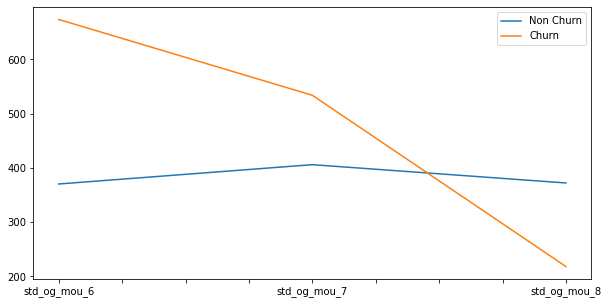

,std_og_mou_6,std_og_mou_7,std_og_mou_8
Non Churn,370.427561,406.040929,372.316528
Churn,673.779803,534.003150,218.230240


In [68]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 ])

**Insights**

STD Out going calls reduces drastically from July to August for churned users

### Others and total outgoing mou calls 

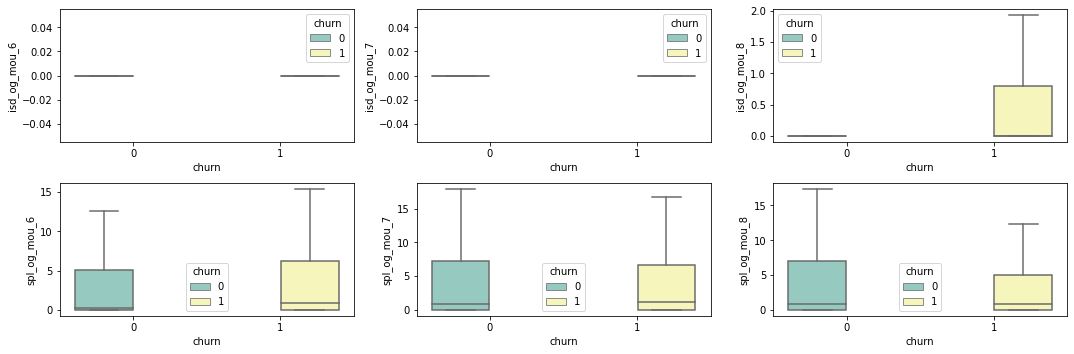

In [69]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

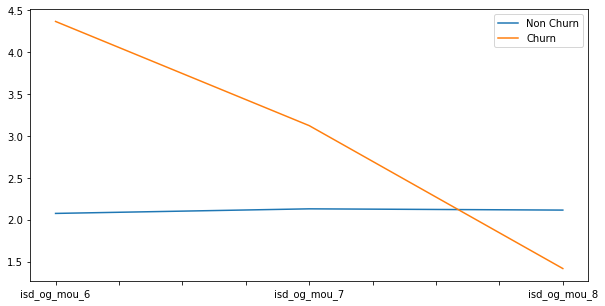

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
Non Churn,2.074680,2.129351,2.114374
Churn,4.368044,3.123427,1.416131


In [70]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 ])


<Figure size 1080x360 with 0 Axes>

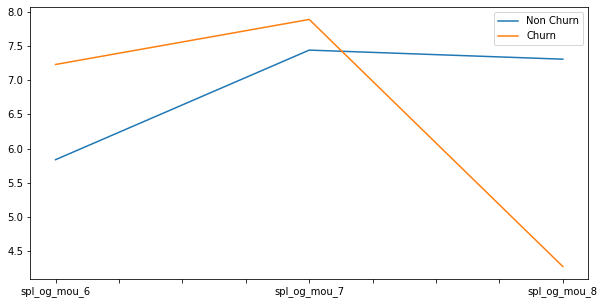

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8
Non Churn,5.837517,7.437069,7.304715
Churn,7.227405,7.884750,4.277394


In [71]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,[ 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8'
 ])

**Insights**

ISD and special out going calls reduces drastically from July to August for churned users

### ISD v.s Special calls 

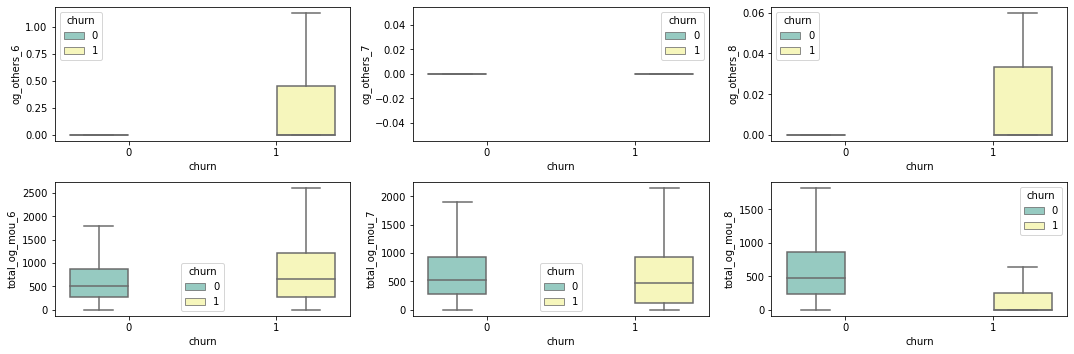

In [72]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

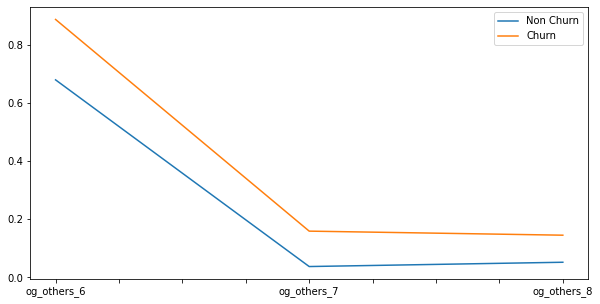

,og_others_6,og_others_7,og_others_8
Non Churn,0.679342,0.037387,0.052135
Churn,0.887062,0.159124,0.145184


In [73]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['og_others_6',
 'og_others_7',
 'og_others_8'])


<Figure size 1080x360 with 0 Axes>

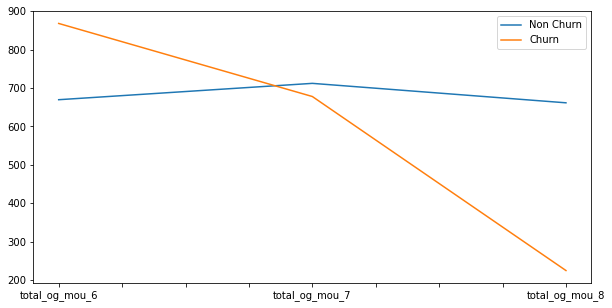

,total_og_mou_6,total_og_mou_7,total_og_mou_8
Non Churn,669.554896,712.080684,661.480046
Churn,867.961342,677.868909,225.083741


In [74]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8'])

**Insights**

Total out going calls reduces drastically from July to August for churned users

## Incoming calls

### incoming calls within network v.s outside network

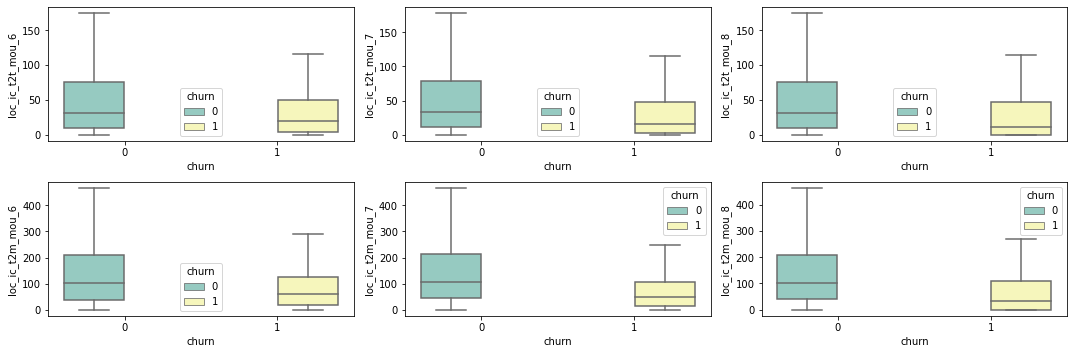

In [75]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

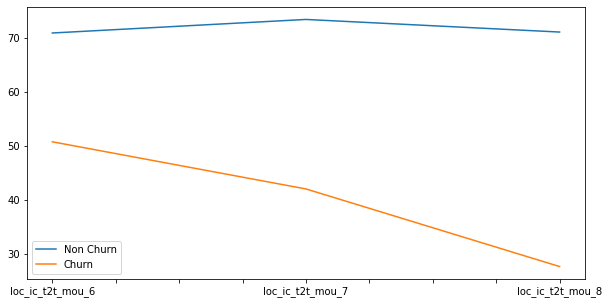

,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8
Non Churn,70.999808,73.516253,71.176051
Churn,50.790054,42.031027,27.618065


In [76]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8'])


<Figure size 1080x360 with 0 Axes>

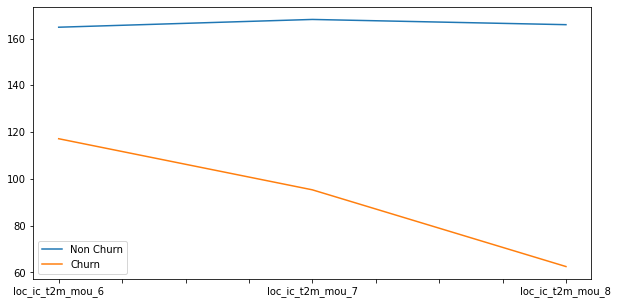

,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8
Non Churn,164.866149,168.190517,165.956584
Churn,117.174034,95.321943,62.508206


In [77]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8'])


**Insights**

incoming calls within network and inside network reduces drastically by August for churned users

### incoming calls to fixed lines of T

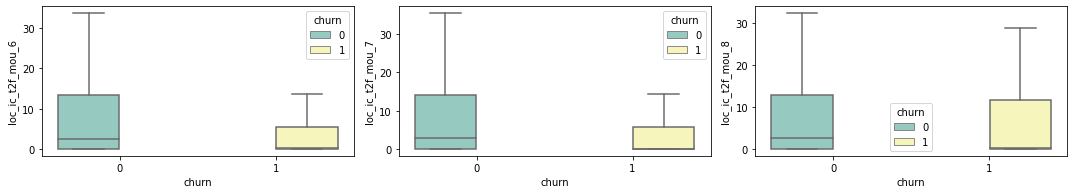

In [78]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

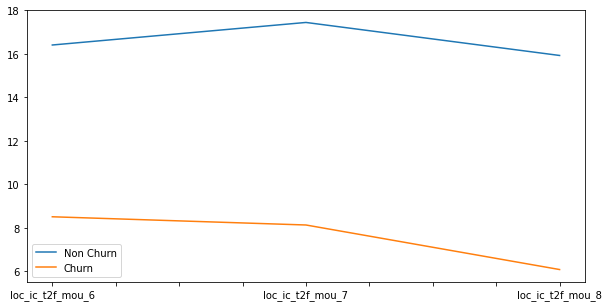

,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8
Non Churn,16.405018,17.441597,15.923969
Churn,8.509941,8.132014,6.084446


In [79]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8'])


### incoming local calls - within same telecome circle

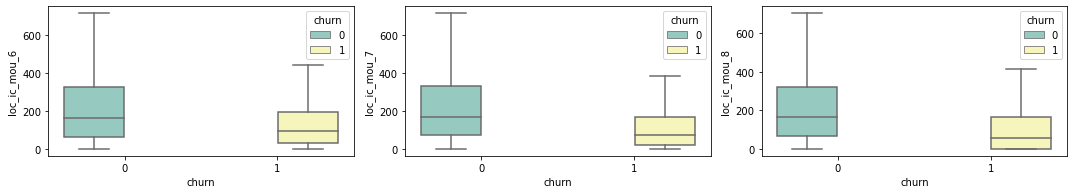

In [80]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

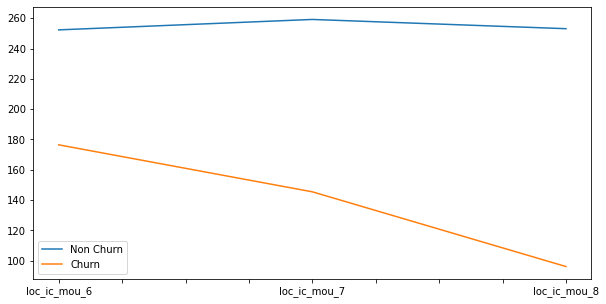

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
Non Churn,252.281062,259.158686,253.066813
Churn,176.482407,145.492583,96.216851


In [81]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8'])


**Insights**

incoming calls within network and inside network reduces drastically by August for churned users

### incoming STD calls - within same telecome circle (within n/w outside n/w)

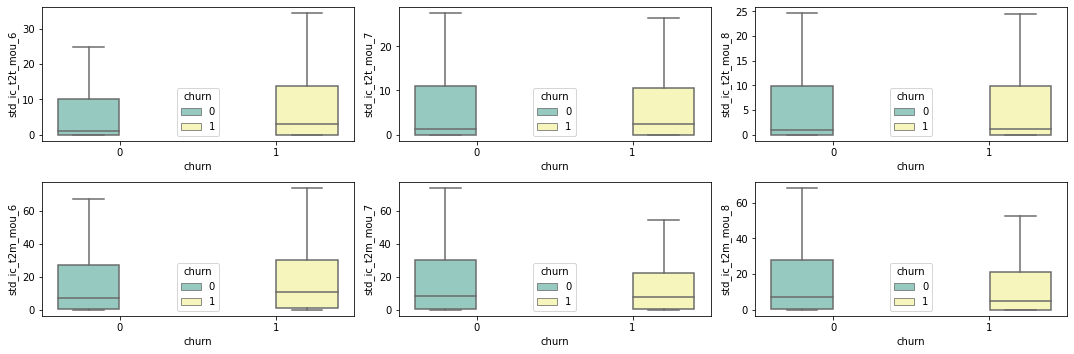

In [82]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

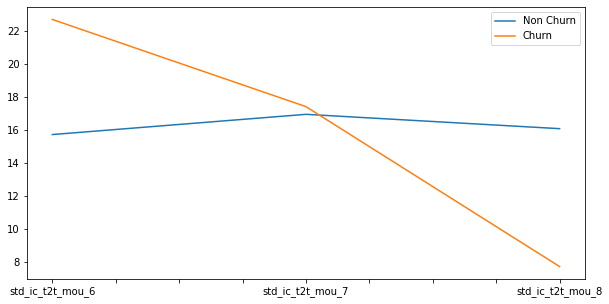

,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8
Non Churn,15.726033,16.954332,16.084157
Churn,22.718340,17.422766,7.708467


In [83]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8'
 ])


<Figure size 1080x360 with 0 Axes>

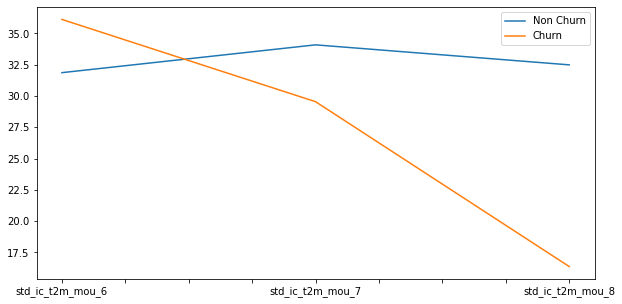

,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8
Non Churn,31.865918,34.088315,32.489599
Churn,36.118599,29.545395,16.370132


In [84]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8'
 ])


**Insights**

STD incoming calls within network and inside network reduces drastically by August for churned users

### incoming STD calls 

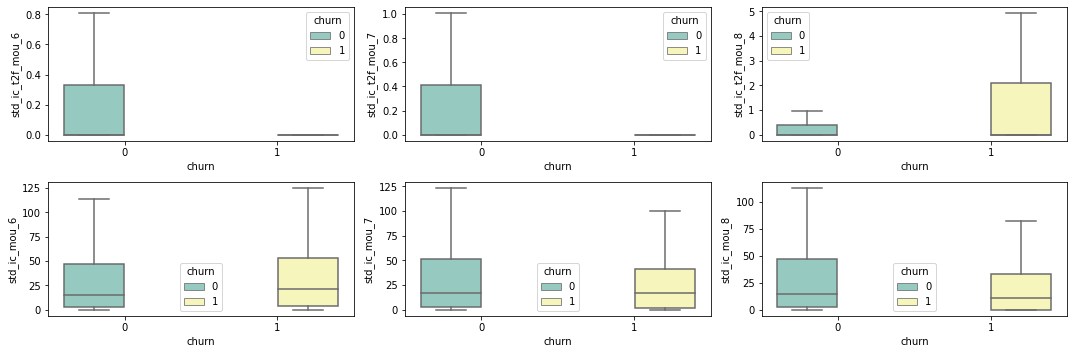

In [85]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 ])
plt.show()

<Figure size 1080x360 with 0 Axes>

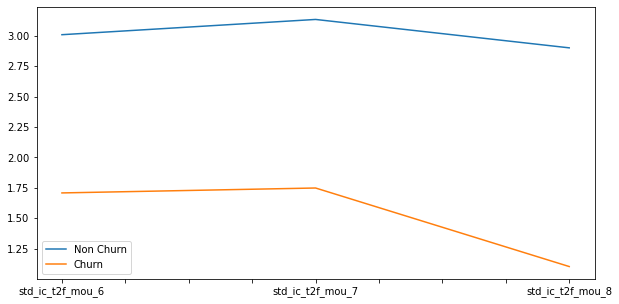

,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8
Non Churn,3.009689,3.135151,2.901557
Churn,1.707897,1.748369,1.102230


In [86]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8'
 ])


<Figure size 1080x360 with 0 Axes>

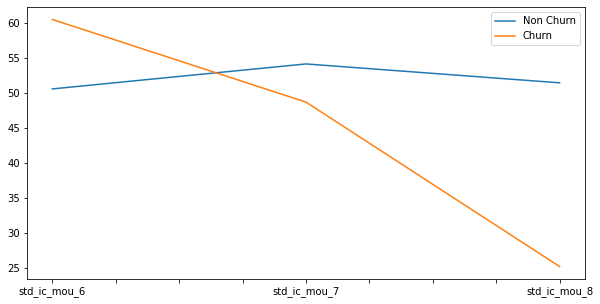

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
Non Churn,50.605613,54.181898,51.479282
Churn,60.549121,48.720249,25.183099


In [87]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 ])

**Insights**

STD incoming calls reduces drastically from July to August for churned users

### Others and total incoming mou calls 

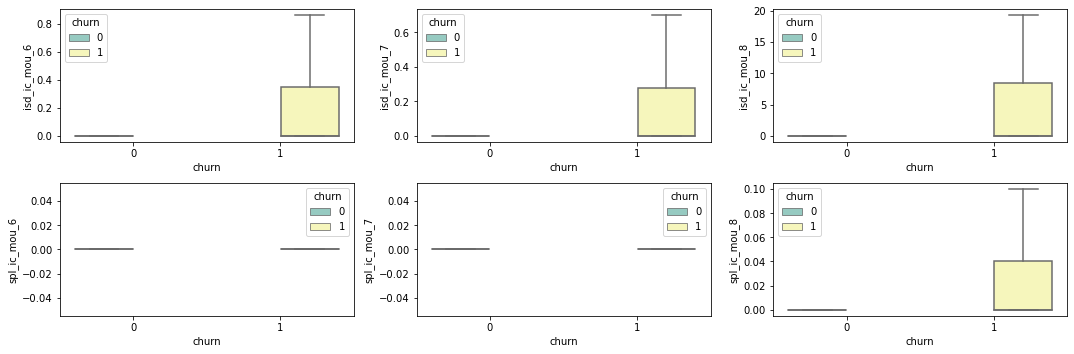

In [88]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

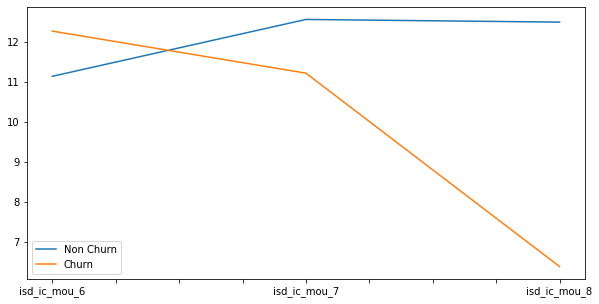

,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
Non Churn,11.137349,12.560526,12.493364
Churn,12.268540,11.215829,6.374586


In [89]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 ])


<Figure size 1080x360 with 0 Axes>

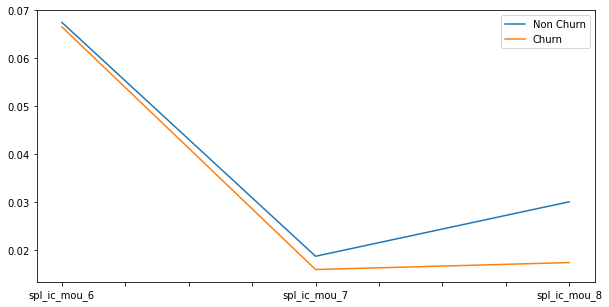

,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8
Non Churn,0.067460,0.018645,0.030018
Churn,0.066527,0.015873,0.017326


In [90]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,[ 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8'
 ])

**Insights**

ISD and special incoming calls reduces drastically from July to August for churned users

### ISD v.s Special calls 

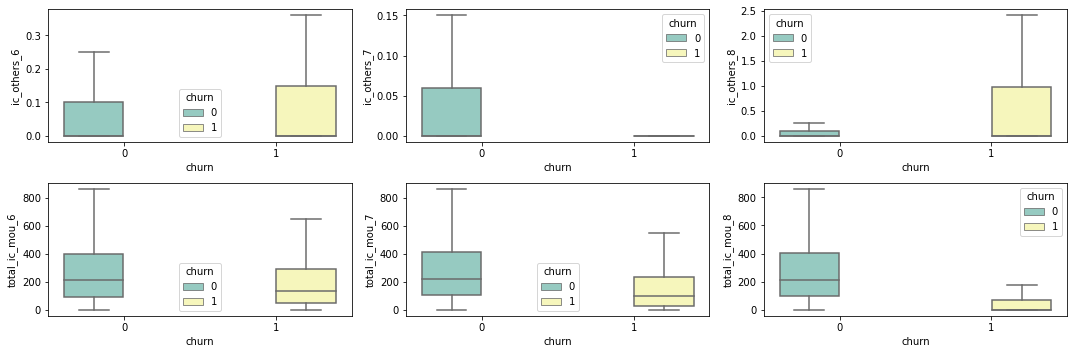

In [91]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

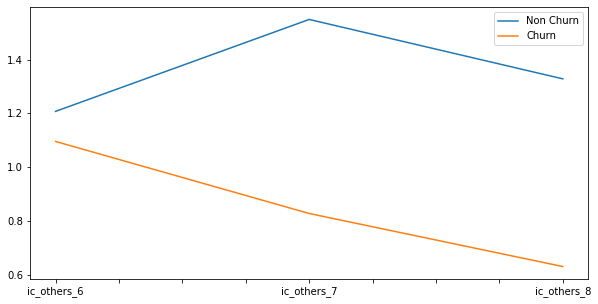

,ic_others_6,ic_others_7,ic_others_8
Non Churn,1.207479,1.549506,1.328445
Churn,1.095481,0.827420,0.630015


In [92]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['ic_others_6',
 'ic_others_7',
 'ic_others_8'])


<Figure size 1080x360 with 0 Axes>

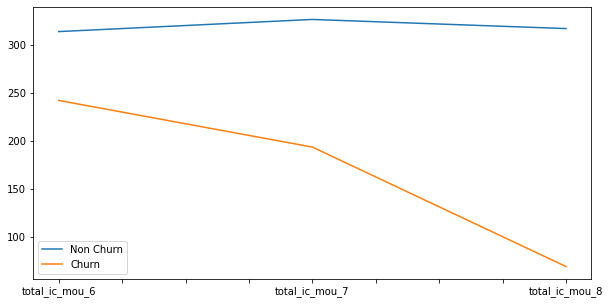

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
Non Churn,313.712052,326.369333,316.858595
Churn,241.954404,193.341076,68.807042


In [93]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8'])

**Insights**

Total incoming calls reduces drastically from July to August for churned users

## Max recharge v.s last day recharge amount

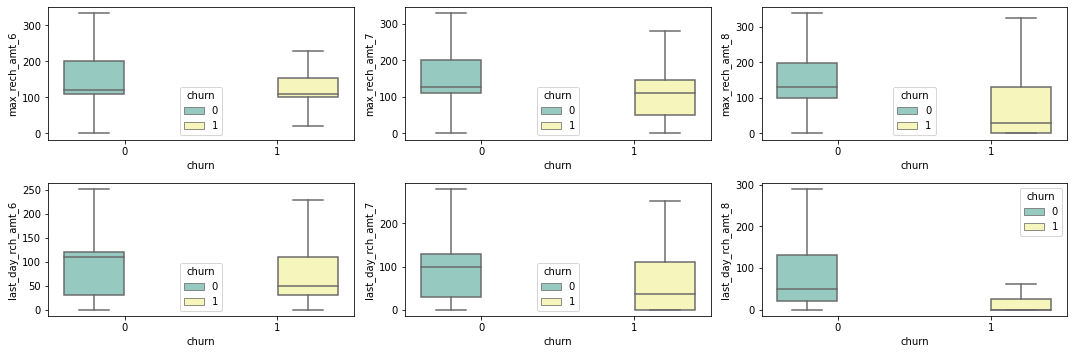

In [94]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8','last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

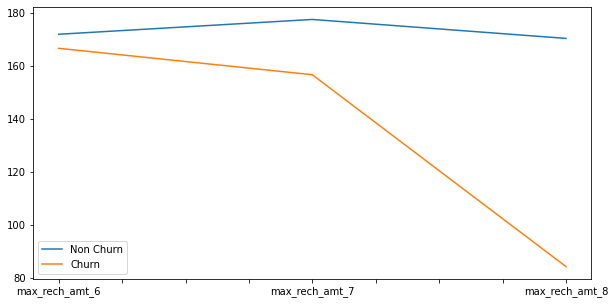

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
Non Churn,171.872456,177.463746,170.309942
Churn,166.566911,156.599691,84.193598


In [95]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8'])


<Figure size 1080x360 with 0 Axes>

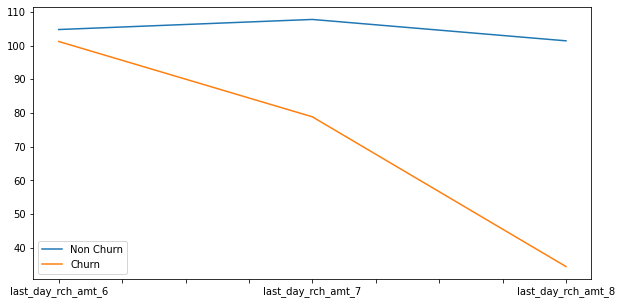

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
Non Churn,104.791925,107.783281,101.440514
Churn,101.247204,78.893174,34.460085


In [96]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8'])


**Insights**

The max and last recharge amount reduces from July to August

## 2G / 3G packs

### Volume based 2g v.s 3g plans

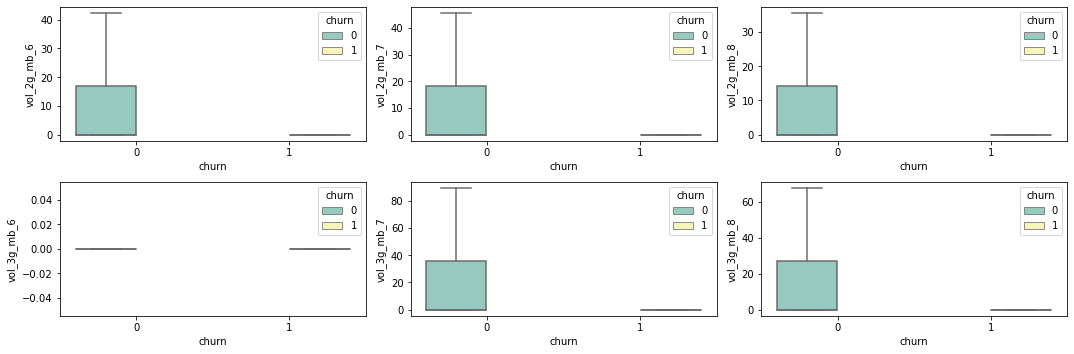

In [97]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8'])
plt.show()

<Figure size 1080x360 with 0 Axes>

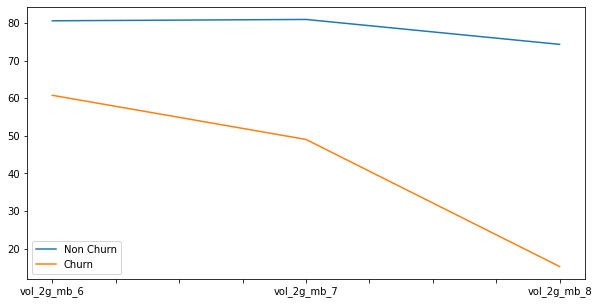

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
Non Churn,80.569210,80.925060,74.309036
Churn,60.775588,49.054393,15.283185


In [98]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8'])


<Figure size 1080x360 with 0 Axes>

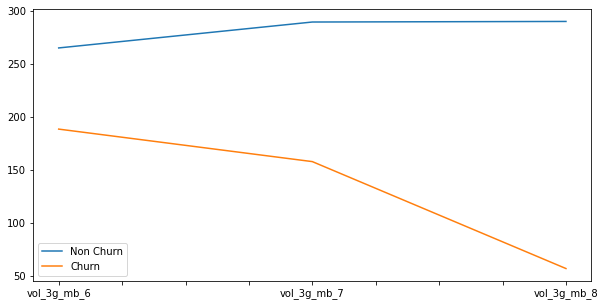

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Non Churn,265.012522,289.478375,290.01639
Churn,188.395461,157.714254,56.77688


In [99]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8'])

**Insights**

The volume of 2g/3g mobile data usage reduces for churned customers

### monthly v.s sachet 2G plans

In [100]:
# The values present in monthly/sachet plans seems to be categories(months/days) opted by different user
data4.monthly_2g_6.value_counts()

0    26682
1     2951
2      345
3       26
4        7
Name: monthly_2g_6, dtype: int64

In [101]:
# Changing the data type for the categorical variables

#data4 = data4.astype({"monthly_2g_6":'object',"monthly_2g_7":'object',"monthly_2g_8":'object',"sachet_2g_6":'object',"sachet_2g_7":'object',"sachet_2g_8":'object'})
#data4[['monthly_2g_6',
# 'monthly_2g_7',
 #'monthly_2g_8']].info()

In [102]:
# Function to plot multiple bar charts
def pltvar(r,c,columns,rot=45):
    for i,col in zip(range(1,(r*c)+1),columns):
        plt.subplot(r,c,i)
        plt.title('Distribution of Catgeories in '+col+ ' Feature',size=10,color='Green')
        sns.countplot(x=col,hue='churn',data=data4)
        plt.xticks(rotation=rot)
        plt.tight_layout(pad=1.0)

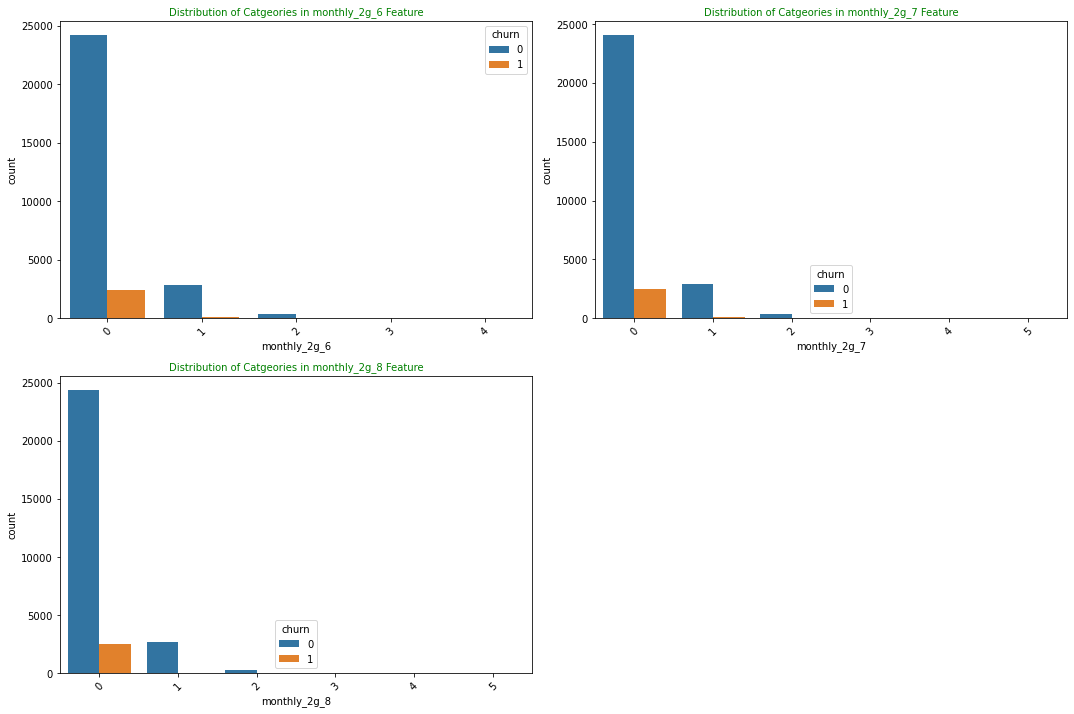

In [103]:
plt.figure(figsize=(15,10))
pltvar(2,2,['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8'])

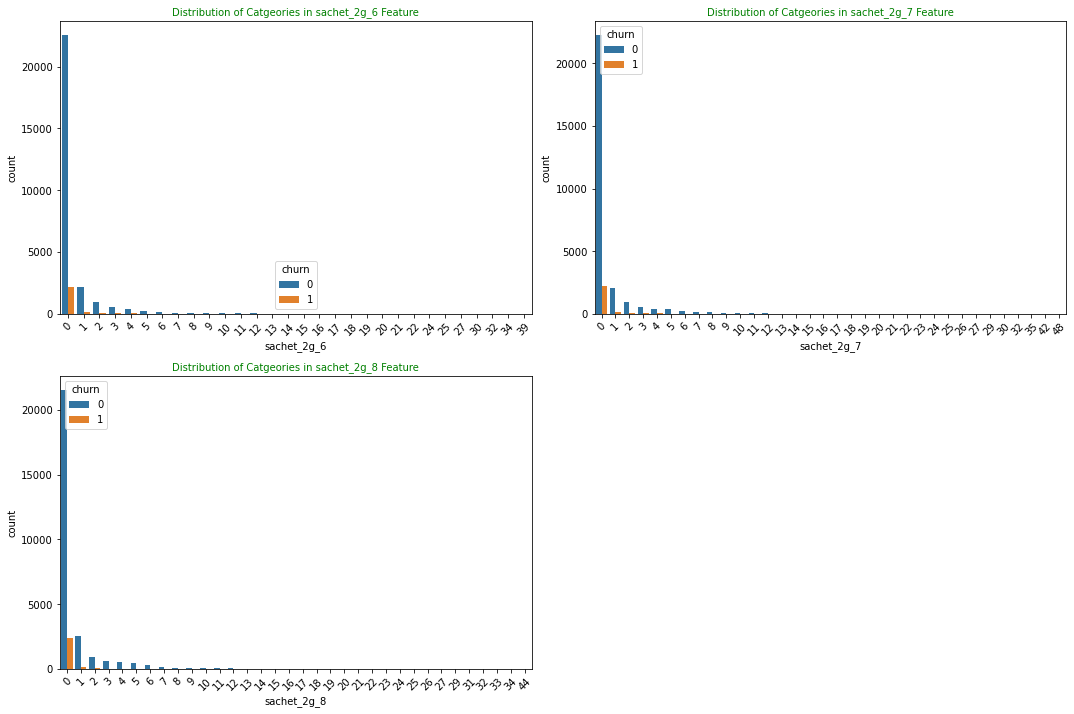

In [104]:
plt.figure(figsize=(15,10))
pltvar(2,2,['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8'])

**Insights**

The monthly/sachet plans usage is least churned customers across all three months

### monthly v.s sachet 3g plans

In [105]:
data4.monthly_3g_6.value_counts()

0     26432
1      2541
2       697
3       207
4        74
5        32
6        11
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64

In [106]:
# Changing the data type for the categorical variables

#data4 = data4.astype({"monthly_3g_6":'object',"monthly_3g_7":'object',"monthly_3g_8":'object',"sachet_3g_6":'object',"sachet_3g_7":'object',"sachet_3g_8":'object'})
#data4[['monthly_3g_6',
# 'monthly_3g_7',
# 'monthly_3g_8']].info()

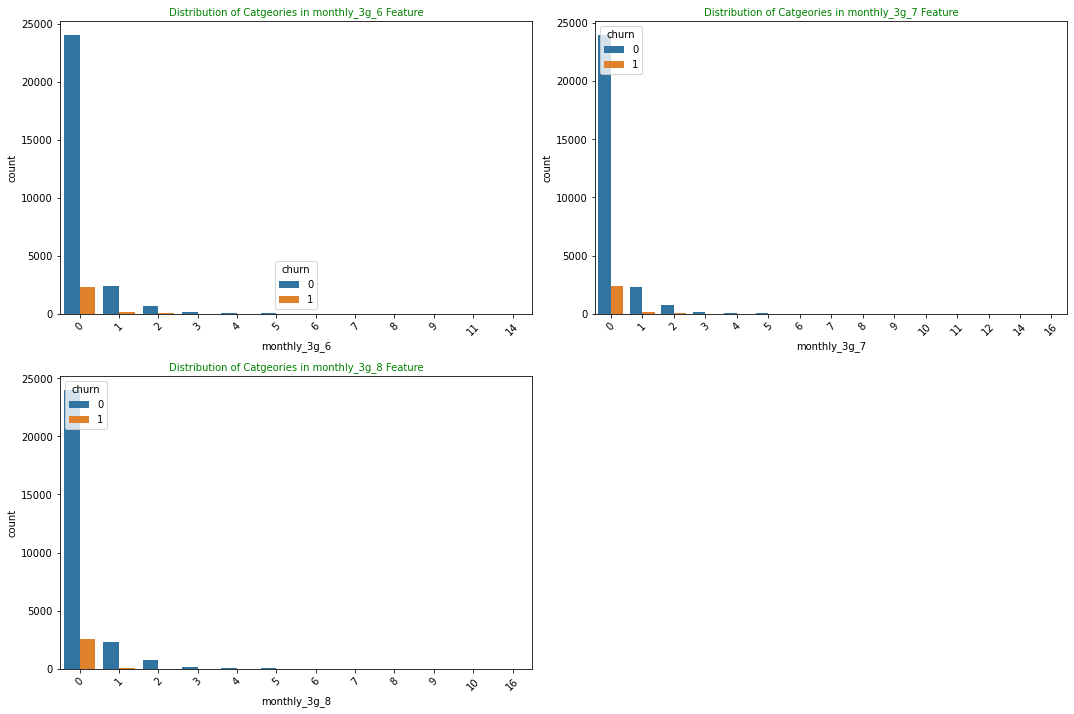

In [107]:
plt.figure(figsize=(15,10))
pltvar(2,2,['monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8'])

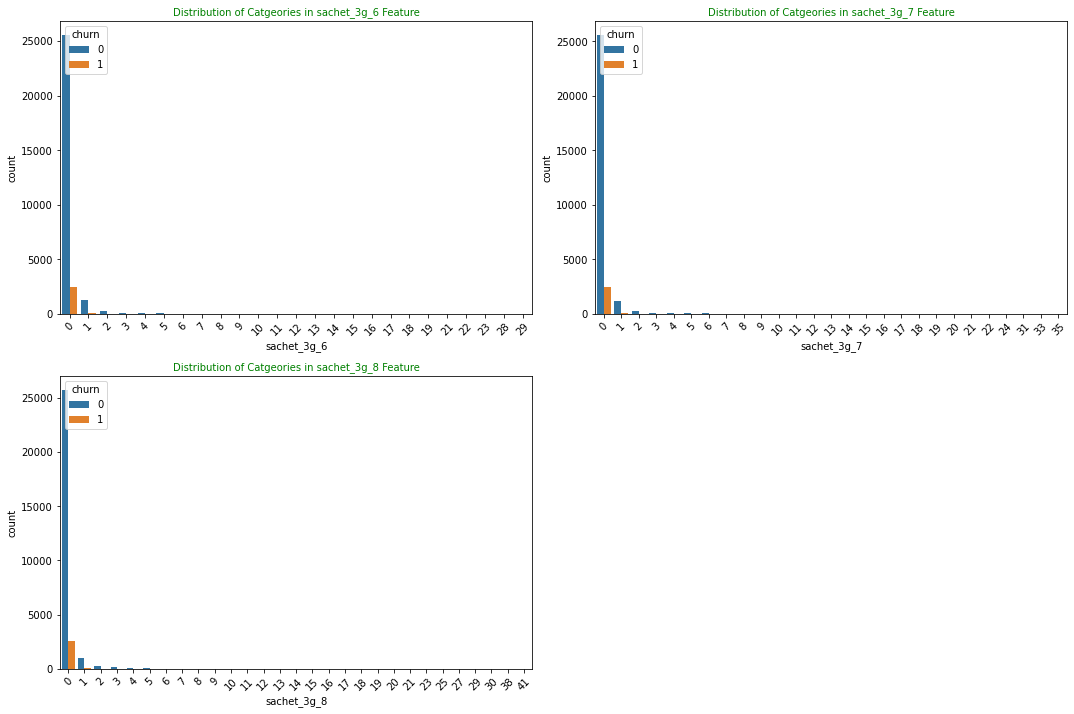

In [108]:
plt.figure(figsize=(15,10))
pltvar(2,2,['sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'])

**Insights**

The monthly/sachet plans usage reduces reduces for churned customers from July to August

## Age on network

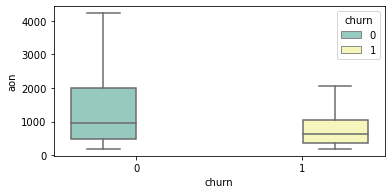

In [109]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['aon'])
plt.show()

**Insights**

The churned users have stayed a very short time on the network compared to non churners

<Figure size 1080x360 with 0 Axes>

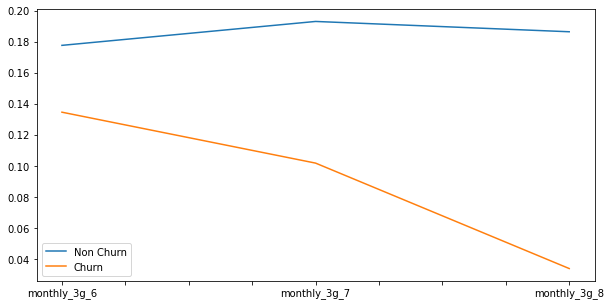

,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.177621,0.193012,0.186374
Churn,0.134593,0.101813,0.033938


In [110]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8'])


<Figure size 1080x360 with 0 Axes>

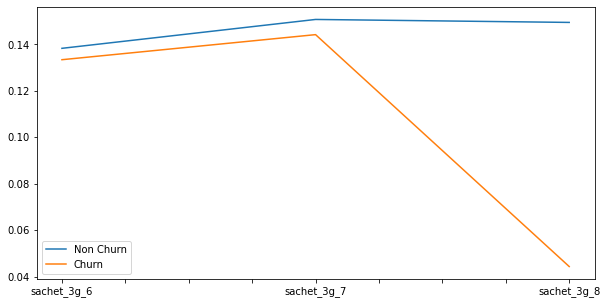

,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,0.138340,0.150777,0.14950
Churn,0.133436,0.144234,0.04435


In [111]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'])

**Insights**

The monthly/sachet plans usage reduces reduces for churned customers from July to August

## Volume based cost 3g plans

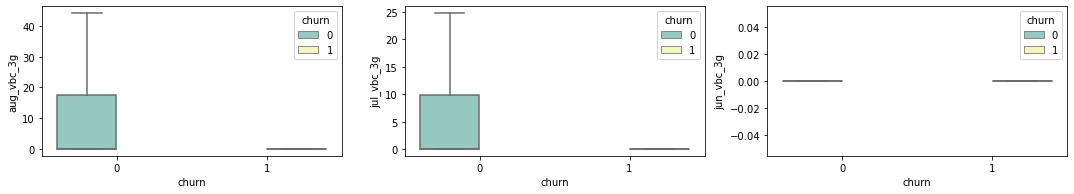

In [112]:
# Plotting the distribution
plt.figure(figsize=(15, 5))
pltbox(2,3,['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g'])
plt.show()

<Figure size 1080x360 with 0 Axes>

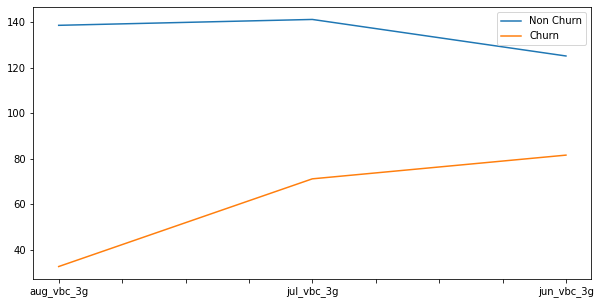

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
Non Churn,138.597023,141.178182,125.124167
Churn,32.610659,71.143880,81.564601


In [113]:
# plotting the mean across the months
plt.figure(figsize=(15, 5))
plot_mean_bar_chart(data4,['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g'])


**Insights**

Volume based plan enrollment reduces from June to August for churned users

In [114]:
data4.shape

(30011, 135)

## Outlier Treatment
- A lot of variables have outliers which can be observed in the visualization in box plots.
- They can be capped

### Integer columns

In [115]:
int_columns=data4.select_dtypes(include='int64').columns
int_columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'churn'],
      dtype='object')

In [116]:
int_columns=list(int_columns[:-1])
int_columns

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon']

In [117]:
for i in int_columns:
    print("quantile values :",i)
    quantile_values=(np.quantile(data4[i],[0.0,0.05,0.1,0.2,0.9,0.95,0.99,1.0]))
    for i,j in zip([0.0,0.05,0.1,0.2,0.9,0.95,0.99,1.0],quantile_values):
        print(i,'----', j )
    print()

quantile values : total_rech_num_6
0.0 ---- 0.0
0.05 ---- 3.0
0.1 ---- 4.0
0.2 ---- 6.0
0.9 ---- 23.0
0.95 ---- 30.0
0.99 ---- 48.0
1.0 ---- 307.0

quantile values : total_rech_num_7
0.0 ---- 0.0
0.05 ---- 3.0
0.1 ---- 4.0
0.2 ---- 5.0
0.9 ---- 23.0
0.95 ---- 30.0
0.99 ---- 48.0
1.0 ---- 138.0

quantile values : total_rech_num_8
0.0 ---- 0.0
0.05 ---- 1.0
0.1 ---- 2.0
0.2 ---- 4.0
0.9 ---- 21.0
0.95 ---- 28.0
0.99 ---- 46.0
1.0 ---- 196.0

quantile values : total_rech_amt_6
0.0 ---- 0.0
0.05 ---- 240.0
0.1 ---- 317.0
0.2 ---- 400.0
0.9 ---- 1180.0
0.95 ---- 1480.0
0.99 ---- 2376.0
1.0 ---- 35190.0

quantile values : total_rech_amt_7
0.0 ---- 0.0
0.05 ---- 220.0
0.1 ---- 306.0
0.2 ---- 395.0
0.9 ---- 1194.0
0.95 ---- 1510.0
0.99 ---- 2426.9000000000015
1.0 ---- 40335.0

quantile values : total_rech_amt_8
0.0 ---- 0.0
0.05 ---- 0.0
0.1 ---- 97.0
0.2 ---- 260.0
0.9 ---- 1155.0
0.95 ---- 1494.0
0.99 ---- 2341.9000000000015
1.0 ---- 45320.0

quantile values : max_rech_amt_6
0.0 ---- 0.0
0.0

## Insights and observations:

- We could see from the above cell that there are outiers present in majority of the columns where we could see big difference in the vlaues from 99th perntile values to 100 th percentile values


## Capping outliers

In [118]:

len_intcolumns=len(int_columns)

for i,j in zip(int_columns,range(len_intcolumns)):
    percentilevalues = data4[i].quantile([0.0,0.99]).values
    data4[i] = np.clip(data4[i], percentilevalues[0], percentilevalues[1])  # Replace the original features after capping the data in the original dataframe 
data4.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790.0,2341.9,1000,790,951,0,0,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0.0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601.0,120.0,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0.0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253.0,717.0,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69

In [119]:
for i in int_columns:
    print("quantile values After capping :",i)
    quantile_values=(np.quantile(data4[i],[0.0,0.05,0.1,0.2,0.9,0.95,0.99,1.0]))
    for i,j in zip([0.0,0.05,0.1,0.2,0.9,0.95,0.99,1.0],quantile_values):
        print(i,'----', j )
    print()

quantile values After capping : total_rech_num_6
0.0 ---- 0.0
0.05 ---- 3.0
0.1 ---- 4.0
0.2 ---- 6.0
0.9 ---- 23.0
0.95 ---- 30.0
0.99 ---- 48.0
1.0 ---- 48.0

quantile values After capping : total_rech_num_7
0.0 ---- 0.0
0.05 ---- 3.0
0.1 ---- 4.0
0.2 ---- 5.0
0.9 ---- 23.0
0.95 ---- 30.0
0.99 ---- 48.0
1.0 ---- 48.0

quantile values After capping : total_rech_num_8
0.0 ---- 0.0
0.05 ---- 1.0
0.1 ---- 2.0
0.2 ---- 4.0
0.9 ---- 21.0
0.95 ---- 28.0
0.99 ---- 46.0
1.0 ---- 46.0

quantile values After capping : total_rech_amt_6
0.0 ---- 0.0
0.05 ---- 240.0
0.1 ---- 317.0
0.2 ---- 400.0
0.9 ---- 1180.0
0.95 ---- 1480.0
0.99 ---- 2376.0
1.0 ---- 2376.0

quantile values After capping : total_rech_amt_7
0.0 ---- 0.0
0.05 ---- 220.0
0.1 ---- 306.0
0.2 ---- 395.0
0.9 ---- 1194.0
0.95 ---- 1510.0
0.99 ---- 2426.8100000000027
1.0 ---- 2426.9000000000015

quantile values After capping : total_rech_amt_8
0.0 ---- 0.0
0.05 ---- 0.0
0.1 ---- 97.0
0.2 ---- 260.0
0.9 ---- 1155.0
0.95 ---- 1494.0
0.99 

## Insights;
- As we can see from  the above cell we have capped the values correctly which is good for further analysis

### Float variables

In [120]:
## Float

float_columns=data4.select_dtypes(include='float64').columns
float_columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'sachet_2g_6', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'average_rech_amt_6_7'],
      dtype='object', length=112)

In [121]:
for i in float_columns:
    print("quantile values :",i)
    quantile_values=(np.quantile(data4[i],[0.0,0.05,0.1,0.2,0.9,0.95,0.99,1.0]))
    for i,j in zip([0.0,0.05,0.1,0.2,0.9,0.95,0.99,1.0],quantile_values):
        print(i,'----', j )
    print()

quantile values : arpu_6
0.0 ---- -2258.709
0.05 ---- 201.926
0.1 ---- 270.491
0.2 ---- 338.85400000000004
0.9 ---- 994.0989999999999
0.95 ---- 1240.7935
0.99 ---- 1983.089500000001
1.0 ---- 27731.088

quantile values : arpu_7
0.0 ---- -2014.045
0.05 ---- 212.671
0.1 ---- 274.341
0.2 ---- 339.335
0.9 ---- 995.557
0.95 ---- 1261.4215
0.99 ---- 1999.3745000000017
1.0 ---- 35145.834

quantile values : arpu_8
0.0 ---- -945.808
0.05 ---- 22.206
0.1 ---- 134.17
0.2 ---- 252.3
0.9 ---- 985.202
0.95 ---- 1258.5555
0.99 ---- 1987.9344000000017
1.0 ---- 33543.623999999996

quantile values : onnet_mou_6
0.0 ---- 0.0
0.05 ---- 3.855
0.1 ---- 12.21
0.2 ---- 31.86
0.9 ---- 794.98
0.95 ---- 1153.97
0.99 ---- 2166.3700000000035
1.0 ---- 7376.71

quantile values : onnet_mou_7
0.0 ---- 0.0
0.05 ---- 3.745
0.1 ---- 11.69
0.2 ---- 31.34
0.9 ---- 824.38
0.95 ---- 1208.175
0.99 ---- 2220.367000000003
1.0 ---- 8157.78

quantile values : onnet_mou_8
0.0 ---- 0.0
0.05 ---- 1.01
0.1 ---- 6.88
0.2 ---- 23.76
0.9

In [122]:

len_floatcolumns=len(float_columns)

for i,j in zip(float_columns,range(len_floatcolumns)):
    percentilevalues = data4[i].quantile([0.0,0.99]).values
    data4[i] = np.clip(data4[i], percentilevalues[0], percentilevalues[1])  # Replace the original features after capping the data in the original dataframe 
data4.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,churn
7,1069.180,1349.850,1987.9344,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,5,5,7,1580,790.0,2341.81,1000,790,951,0,0,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0.0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,378.721,492.223,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,19,21,14,437,601.0,120.00,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0.0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,492.846,205.671,593.2600,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,239.60,62.11,249.888,20.708,16.24,21.44,6,4,11,507,253.0,717.00,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.

In [123]:
for i in float_columns:
    print("quantile values After capping :",i)
    quantile_values=(np.quantile(data4[i],[0.0,0.05,0.1,0.2,0.9,0.95,0.99,1.0]))
    for i,j in zip([0.0,0.05,0.1,0.2,0.9,0.95,0.99,1.0],quantile_values):
        print(i,'----', j )
    print()

quantile values After capping : arpu_6
0.0 ---- -2258.709
0.05 ---- 201.926
0.1 ---- 270.491
0.2 ---- 338.85400000000004
0.9 ---- 994.0989999999999
0.95 ---- 1240.7935
0.99 ---- 1983.0260500000018
1.0 ---- 1983.089500000001

quantile values After capping : arpu_7
0.0 ---- -2014.045
0.05 ---- 212.671
0.1 ---- 274.341
0.2 ---- 339.335
0.9 ---- 995.557
0.95 ---- 1261.4215
0.99 ---- 1999.2615500000031
1.0 ---- 1999.3745000000017

quantile values After capping : arpu_8
0.0 ---- -945.808
0.05 ---- 22.206
0.1 ---- 134.17
0.2 ---- 252.3
0.9 ---- 985.202
0.95 ---- 1258.5555
0.99 ---- 1987.827660000003
1.0 ---- 1987.9344000000017

quantile values After capping : onnet_mou_6
0.0 ---- 0.0
0.05 ---- 3.855
0.1 ---- 12.21
0.2 ---- 31.86
0.9 ---- 794.98
0.95 ---- 1153.97
0.99 ---- 2166.172000000006
1.0 ---- 2166.3700000000035

quantile values After capping : onnet_mou_7
0.0 ---- 0.0
0.05 ---- 3.745
0.1 ---- 11.69
0.2 ---- 31.34
0.9 ---- 824.38
0.95 ---- 1208.175
0.99 ---- 2220.1933000000054
1.0 ---- 2

## Insights;
- As we can see from  the above cell we have capped the values correctly which is good for further analysis
- So we have treated all the columns with integer and float datatype

## Derived Variables
- Difference between the recharge/calls/mou at month 8 with average of month 6 & 7
- This variable could bring important information about how much was the difference for the customers who are loyal and once who plan to churn

In [124]:
data4.shape

(30011, 135)

In [125]:
data4['arpu_diff'] = data4.arpu_8 - ((data4.arpu_6 + data4.arpu_7)/2)

data4['onnet_mou_diff'] = data4.onnet_mou_8 - ((data4.onnet_mou_6 + data4.onnet_mou_7)/2)

data4['offnet_mou_diff'] = data4.offnet_mou_8 - ((data4.offnet_mou_6 + data4.offnet_mou_7)/2)

data4['roam_ic_mou_diff'] = data4.roam_ic_mou_8 - ((data4.roam_ic_mou_6 + data4.roam_ic_mou_7)/2)

data4['roam_og_mou_diff'] = data4.roam_og_mou_8 - ((data4.roam_og_mou_6 + data4.roam_og_mou_7)/2)

data4['loc_og_mou_diff'] = data4.loc_og_mou_8 - ((data4.loc_og_mou_6 + data4.loc_og_mou_7)/2)

data4['std_og_mou_diff'] = data4.std_og_mou_8 - ((data4.std_og_mou_6 + data4.std_og_mou_7)/2)

data4['isd_og_mou_diff'] = data4.isd_og_mou_8 - ((data4.isd_og_mou_6 + data4.isd_og_mou_7)/2)

data4['spl_og_mou_diff'] = data4.spl_og_mou_8 - ((data4.spl_og_mou_6 + data4.spl_og_mou_7)/2)

data4['total_og_mou_diff'] = data4.total_og_mou_8 - ((data4.total_og_mou_6 + data4.total_og_mou_7)/2)

data4['loc_ic_mou_diff'] = data4.loc_ic_mou_8 - ((data4.loc_ic_mou_6 + data4.loc_ic_mou_7)/2)

data4['std_ic_mou_diff'] = data4.std_ic_mou_8 - ((data4.std_ic_mou_6 + data4.std_ic_mou_7)/2)

data4['isd_ic_mou_diff'] = data4.isd_ic_mou_8 - ((data4.isd_ic_mou_6 + data4.isd_ic_mou_7)/2)

data4['spl_ic_mou_diff'] = data4.spl_ic_mou_8 - ((data4.spl_ic_mou_6 + data4.spl_ic_mou_7)/2)

data4['total_ic_mou_diff'] = data4.total_ic_mou_8 - ((data4.total_ic_mou_6 + data4.total_ic_mou_7)/2)

data4['total_rech_num_diff'] = data4.total_rech_num_8 - ((data4.total_rech_num_6 + data4.total_rech_num_7)/2)

data4['total_rech_amt_diff'] = data4.total_rech_amt_8 - ((data4.total_rech_amt_6 + data4.total_rech_amt_7)/2)

data4['max_rech_amt_diff'] = data4.max_rech_amt_8 - ((data4.max_rech_amt_6 + data4.max_rech_amt_7)/2)

data4['vol_2g_mb_diff'] = data4.vol_2g_mb_8 - ((data4.vol_2g_mb_6 + data4.vol_2g_mb_7)/2)

data4['vol_3g_mb_diff'] = data4.vol_3g_mb_8 - ((data4.vol_3g_mb_6 + data4.vol_3g_mb_7)/2)

In [126]:
#inspecting one of the derived variables

data4[['arpu_diff','arpu_6','arpu_7','arpu_8']].head()

,arpu_diff,arpu_6,arpu_7,arpu_8
7,778.4194,1069.180,1349.850,1987.9344
8,-298.1100,378.721,492.223,137.3620
13,244.0015,492.846,205.671,593.2600
16,-177.5280,430.975,299.869,187.8940
17,-328.9950,690.008,18.980,25.4990


In [127]:
# Dropping the variables which have been used to create new variables 
rem_col_1 = []
col = ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_mou','std_og_mou','isd_og_mou','spl_og_mou'
       ,'total_og_mou','loc_ic_mou','std_ic_mou','isd_ic_mou','spl_ic_mou','total_ic_mou','total_rech_num'
       ,'total_rech_amt','max_rech_amt','vol_2g_mb','vol_3g_mb']
for i in col:
    rem_col_1.append(i+'_6')
    rem_col_1.append(i+'_7')
    rem_col_1.append(i+'_8')

data5 = data4.drop(rem_col_1,axis=1)

In [128]:
data4.shape

(30011, 155)

In [129]:
data5.shape

(30011, 95)

In [130]:
# Defining numerical variables
df_numerical = data5.select_dtypes(exclude=['object'])
df_numerical.shape
df_refined = df_numerical.copy()
df_refined.shape

(30011, 95)

## Test-train split and Feature scalling

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# Putting feature variable to X
X = df_refined.drop(['churn'], axis=1)

X.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
7,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,15.740,15.19,15.14,0,0,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,778.4194,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,1156.81,56.0,0.00,0.000
8,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.000,0.00,0.00,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0,1,0,0.0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,-298.1100,-347.280,48.835,0.000,0.000,-270.095,-38.590,0.00,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.00,-92.0,-177.97,-363.535
13,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,20.708,16.24,21.44,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0,0,0,0.0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,244.0015,229.165,216.165,-11.775,-20.180,224.595,234.825,1.29,4.78,465.510,134.415,228.460,99.033,-0.225,573.935,6.0,337.00,20.0,0.02,0.000
16,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.00,0.0,0.0,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.000,0.00,0.00,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,-177.5280,8.350,-100.255,-1.415,-8.870,-59.845,-27.460,0.00,4.28,-83.030,-41.565,-37.420,0.230,0.000,-78.750,-6.0,-299.00,20.0,0.00,0.000
17,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.93,0.0,0.0,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,8.63,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,408.0,-328.9950,-589.805,-25.280,2.430,9.110,-48.770,-574.635,0.00,-1.29,-625.170,-42.135,-4.955,0.000,0.000,-47.095,-6.5,-378.00,-25.0,0.00,0.000


In [133]:
# Putting response variable to y
y = df_refined['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [134]:
# Splitting the data into train and test (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify=y)

### Feature Scaling in Training set

In [135]:
df_numerical_rem_churn = df_numerical.drop('churn',axis=1)
df_numerical_rem_churn.shape

(30011, 94)

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
# Scaling the numerical variables
scaler = StandardScaler()

X_train[list(df_numerical_rem_churn.columns)] = scaler.fit_transform(X_train[list(df_numerical_rem_churn.columns)])

X_train.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
6656,-0.431876,-0.497636,-0.490622,-0.653867,-0.797497,-0.675149,-0.358150,-0.438209,-0.431282,1.633523,-0.347252,-0.346982,0.097109,-0.344066,0.059946,1.107290,-0.334044,0.230844,-0.247327,-0.247404,-0.248479,0.500510,-0.12687,-0.196347,-0.626003,-0.595504,-0.583318,-0.808557,-0.858234,-0.793991,-0.456057,-0.457203,-0.465492,-0.060241,-0.291233,-0.024679,-0.286079,-0.467939,-0.018396,-0.282824,-0.284896,-0.291784,-0.259553,-0.265550,-0.270382,-0.457974,-0.899517,0.344231,-0.511477,-0.511769,-0.525231,-0.58168,-0.588796,-0.566784,-0.547636,-0.552962,-0.534930,-0.33596,-0.341838,-0.322915,-0.335721,-0.350678,-0.371887,-0.326885,-0.330807,-0.322218,-0.234570,-0.232646,-0.219152,-0.950795,-0.378152,-0.371615,-0.356364,-0.766852,-0.039220,0.191829,-0.269247,-1.301480,-0.760446,0.093433,0.028470,0.071763,-0.785137,0.054182,0.109265,0.466918,0.001834,0.521407,0.252027,0.521007,-0.062375,0.261965,0.053454,-0.005367
4043,3.036166,2.826996,2.601171,-0.483621,-0.673731,-0.685891,-0.343957,-0.414652,-0.161854,-0.338231,-0.347252,-0.346982,-0.512332,-0.518425,-0.477819,-0.132116,-0.018955,-0.012673,-0.247327,1.463260,-0.248479,1.050676,-0.12687,-0.196347,4.797526,5.763829,4.301838,-0.711431,-0.548277,-0.737395,-0.391199,-0.361726,-0.370372,-0.409975,-0.397184,-0.397588,0.246209,1.823915,0.878843,-0.282824,6.932063,-0.127433,-0.190085,-0.265550,-0.218952,-0.684066,-0.455269,-0.411931,1.234931,-0.511769,1.635401,0.45921,-0.588796,-0.076317,0.394108,-0.552962,0.158371,-0.33596,-0.341838,-0.322915,1.115964,-0.350678,2.223795,-0.326885,-0.330807,-0.322218,2.107802,-0.232646,-0.219152,-0.268776,-0.378152,-0.371615,-0.356364,0.444030,0.460036,0.124729,0.097559,1.502672,2.024834,-0.563481,0.097313,0.071763,-0.195903,-0.134608,-2.037043,-0.764709,-1.492635,-1.981805,-1.965620,1.080855,0.724886,-0.217721,0.044652,-0.555142
37140,-0.502732,-0.360682,-0.534219,-0.817570,-0.819042,-0.780514,-0.432494,-0.438209,-0.431282,-0.338231,-0.347252,-0.302309,2.389537,2.970065,4.011261,-0.359366,-0.527190,-0.470846,-0.247327,-0.247404,-0.248479,-0.389647,-0.12687,-0.196347,-0.574777,-0.366618,-0.588918,-0.826350,-0.836962,-0.763429,-0.456057,-0.457203,-0.465492,0.172174,-0.292131,0.077664,-0.164015,-0.246328,-0.208261,-0.282824,-0.284896,-0.291784,-0.036526,-0.265550,-0.270382,-0.638848,-0.899517,0.344231,-0.511477,-0.511769,-0.525231,-0.58168,-0.588796,-0.566784,-0.547636,-0.552962,-0.534930,-0.33596,-0.341838,-0.322915,-0.335721,-0.350678,-0.371887,-0.326885,-0.330807,-0.322218,-0.234570,-0.232646,-0.

## SMOTE technique to increase samples of churned customers compared to not churned

In [138]:
import imblearn
from imblearn.combine import SMOTETomek

In [139]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(0.5,random_state=42)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [140]:
# checking the churn rate before and after applying SMOTE
churn_1 = (sum(y_train)/len(y_train))*100
churn_2 = (sum(y_train_SMOTE)/len(y_train_SMOTE))*100
print("Before smote the number of records {} and the churn rate is {}".format(len(y_train),round(churn_1,2)))
print("After smote the number of records {} and the churn rate is {}".format(len(y_train_SMOTE),round(churn_2,2)))
print('Number of records in X_train before SMOTE {}'.format(len(X_train)))
print('Number of records in X_train after SMOTE {}'.format(len(X_train_SMOTE)))

Before smote the number of records 22508 and the churn rate is 8.64
After smote the number of records 30844 and the churn rate is 33.33
Number of records in X_train before SMOTE 22508
Number of records in X_train after SMOTE 30844


In [141]:
X_train.shape

(22508, 94)

In [142]:
X_train_SMOTE.shape

(30844, 94)

**Insights and Observations**

The up sampling has been done such that the number of churn cases increases from 8% to 50% and now the model can be build using the new training sets

# Step 4 Model Building and PCA

## PCA
- We have lot of features in the training set which can be reduced using PCA

In [143]:
from sklearn.decomposition import PCA

In [144]:
# Initialise PCA without any component size initially
pca=PCA(random_state=42) 

In [145]:
pca.fit(X_train_SMOTE)

PCA(random_state=42)

In [146]:
pca.components_

array([[ 4.94143181e-02,  6.62113538e-02,  9.32481112e-02, ...,
         8.51480958e-02,  2.62147518e-03,  1.79267149e-02],
       [ 5.05037996e-02,  2.53099498e-02, -1.87187819e-02, ...,
        -1.21383691e-01, -4.18802606e-02, -6.76086834e-02],
       [ 1.63653754e-01,  1.56477005e-01,  1.37195461e-01, ...,
        -1.23389014e-02,  2.15275278e-02,  2.04393855e-02],
       ...,
       [-5.46795202e-03, -6.70775533e-03,  1.03242278e-02, ...,
        -1.02523724e-05, -2.63457511e-03, -9.18323639e-03],
       [-1.51704744e-01, -1.51031790e-01,  2.82380713e-01, ...,
         5.21857759e-03,  1.08324004e-03,  1.73416232e-03],
       [-4.04737250e-02, -4.10662668e-02,  7.82248417e-02, ...,
        -5.52230626e-03,  1.59772311e-04,  5.94199121e-04]])

In [147]:
pca.components_.shape

(94, 94)

In [148]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.11216602, 0.18776328, 0.25367407, 0.29737143, 0.33865958,
       0.37497921, 0.40595571, 0.43579651, 0.46378767, 0.48802676,
       0.51141441, 0.53288981, 0.55281782, 0.57164772, 0.59002909,
       0.60736031, 0.6232894 , 0.6386731 , 0.65395279, 0.66910167,
       0.68361155, 0.69763886, 0.7115559 , 0.72502537, 0.73699492,
       0.74875301, 0.76030525, 0.7712454 , 0.78184019, 0.79191791,
       0.80175605, 0.81146997, 0.82089907, 0.8299826 , 0.83892185,
       0.84694452, 0.85472233, 0.86231165, 0.86927431, 0.876171  ,
       0.88257085, 0.88880648, 0.89456093, 0.89985914, 0.90467759,
       0.90944045, 0.91406425, 0.91850208, 0.92281395, 0.92680216,
       0.93074692, 0.93446792, 0.9380005 , 0.94149553, 0.94480598,
       0.94799321, 0.95111692, 0.95413366, 0.95712112, 0.95999989,
       0.96276248, 0.96545069, 0.96806627, 0.97057845, 0.97304393,
       0.97544987, 0.97768846, 0.97981042, 0.98173941, 0.98362332,
       0.98537029, 0.98687598, 0.98834451, 0.9897714 , 0.99116

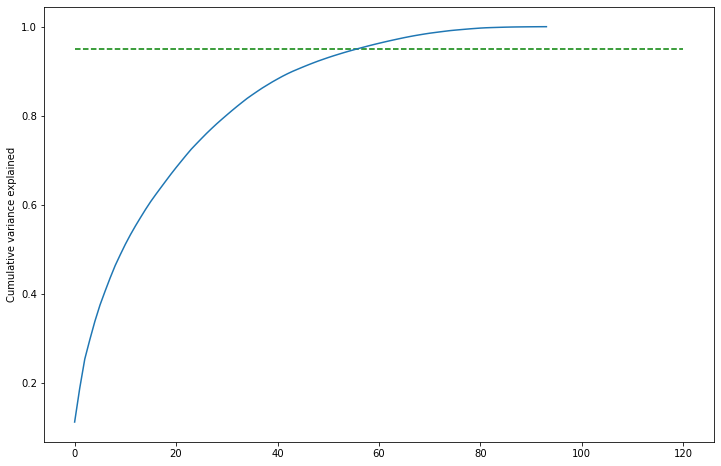

In [149]:
fig = plt.figure(figsize=[12,8])
#plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmin=0,xmax=120, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [150]:
from sklearn.decomposition import IncrementalPCA

In [151]:
pca_final = IncrementalPCA(n_components=65)

In [152]:
X_train_SMOTE.shape

(30844, 94)

In [153]:
df_train_pca = pca_final.fit_transform(X_train_SMOTE)

In [154]:
df_train_pca.shape

(30844, 65)

### Applying PCA on test data set

In [155]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7503, 65)

## Running first model - Logistic Regression

### Applying logistic regression on the data on our Principal components

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [157]:
learner_pca = LogisticRegression()

In [158]:
model_pca = learner_pca.fit(df_train_pca, y_train_SMOTE)

## Insights:
- AUC value is 91 percent
- AUC (Area under the curve) is more in this case which indicates good model since high AUC indicates high TPR and low FPR

### Making predictions on train set

In [159]:
pred_probs_train =model_pca.predict_proba(df_train_pca)

In [160]:
# Calculating the roc_auc_score
"ROC AUC Score for training set is {:2.2}".format(metrics.roc_auc_score(y_train_SMOTE, pred_probs_train[:,1]))

'ROC AUC Score for training set is 0.91'

## Insights:
- AUC value is 85 percent on test data
- AUC (Area under the curve) in this case indicates good model since high AUC indicates high TPR and low FPR

### Making predictions on the test set

In [161]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [162]:
"ROC AUC Score for test set is {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'ROC AUC Score for test set is 0.84'

**Insights and Obervations**

The model seems to give fine output with 20 variables and doesn't seem to overfit on training set. However, lets check how the results are when we use PCA to explain 95 variance

## Apply pca which can explain 95 percent variance

In [163]:
pca_again = PCA(0.95)

In [164]:
# PCA on X_train
df_train_pca2 = pca_again.fit_transform(X_train_SMOTE)

In [165]:
df_train_pca2.shape

(30844, 57)

Following it up with a logistic regression model

In [166]:
learner_pca2 = LogisticRegression()

In [167]:
# Logistic regression on training set
model_pca2 = learner_pca2.fit(df_train_pca2, y_train_SMOTE)
model_pca2

LogisticRegression()

In [168]:
# Transforming the x test based on PCA
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2

array([[  639.79190181,   236.73839804,  1174.76811771, ...,
          -47.98062199,   -92.72896454,    94.70633138],
       [  228.02107031,   713.39807083,   433.32276589, ...,
          -97.82487519,  -106.55526615,   218.09924445],
       [  311.84732071,   516.37195733,  1029.57660443, ...,
          -39.50438   ,  -135.00842497,    75.88195981],
       ...,
       [ 1436.98693377, -1195.84553116,  -167.05157476, ...,
         -131.39356261,  -183.30208377,   341.25261912],
       [  684.69420279,  -243.99425004,   483.48645315, ...,
          -30.78536612,   -76.3045666 ,   161.78237038],
       [ 1334.13664577,   403.22720808,   737.11344601, ...,
          -95.96893664,  -175.74642233,   361.68515988]])

In [169]:
df_test_pca2.shape

(7503, 57)

### Making predictions on train set

In [170]:
# Using the model to predict target variable - df_train_pca2
pred_probs_train2 =model_pca2.predict_proba(df_train_pca2)[:,1]

In [171]:
# Calculating the roc_auc_score
"ROC AUC Score for training set is {:2.2}".format(metrics.roc_auc_score(y_train_SMOTE, pred_probs_train2))

'ROC AUC Score for training set is 0.91'

### Making predictions on the test set

In [172]:
# Using the model to predict target variable - df_test_pca2
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [173]:
"ROC AUC Score for test set is {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'ROC AUC Score for test set is 0.86'

## Insights:
- Results are same when we selected the PCA Component size selected manually and automatically
- Lets understand the resuts better by validating them

In [175]:
y_train_logistic_pred = pd.DataFrame({'Churn_Prob':pred_probs_train2})
y_train_logistic_pred


,Churn_Prob
0,0.225732
1,0.054613
2,0.126844
3,0.200243
4,0.025556
...,...
30839,0.730396
30840,0.214809
30841,0.945203
30842,0.894282


### Finding Optimal Cutoff point

In [176]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_logistic_pred[i]= y_train_logistic_pred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_logistic_pred.head()

,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.225732,1,1,1,0,0,0,0,0,0,0
1,0.054613,1,0,0,0,0,0,0,0,0,0
2,0.126844,1,1,0,0,0,0,0,0,0,0
3,0.200243,1,1,1,0,0,0,0,0,0,0
4,0.025556,1,0,0,0,0,0,0,0,0,0


In [177]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_SMOTE, y_train_logistic_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.333323  1.000000  0.000000
0.1   0.1  0.679484  0.953701  0.542382
0.2   0.2  0.770587  0.908958  0.701405
0.3   0.3  0.821586  0.862757  0.801002
0.4   0.4  0.848334  0.810816  0.867091
0.5   0.5  0.860102  0.750997  0.914653
0.6   0.6  0.852257  0.665305  0.945728
0.7   0.7  0.823045  0.538274  0.965423
0.8   0.8  0.781967  0.378951  0.983465
0.9   0.9  0.755155  0.280712  0.992365


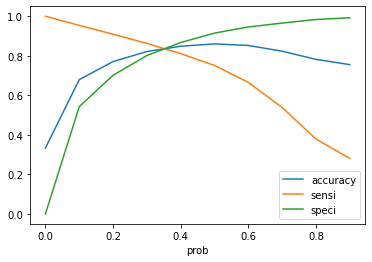

In [178]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Insights and Observations**

Sensitivity and Specificity balance each other at 0.5 probability which could be used as cut off to determine the churn and non churn cases

In [179]:
pred_probs_test2

array([0.00000000e+000, 1.61359814e-152, 0.00000000e+000, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

In [180]:
pred_probs_test3=pred_probs_test2.copy()
pred_probs_test3

array([0.00000000e+000, 1.61359814e-152, 0.00000000e+000, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

In [181]:
pred_probs_test3=(pred_probs_test3>=0.35)
pred_probs_test3

array([False, False, False, ..., False, False, False])

In [182]:
pred_probs_test3=pred_probs_test3.astype('int')
pred_probs_test3

array([0, 0, 0, ..., 0, 0, 0])

In [183]:
print(metrics.classification_report(y_test, pred_probs_test3))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      6855
           1       0.36      0.64      0.46       648

    accuracy                           0.87      7503
   macro avg       0.66      0.77      0.70      7503
weighted avg       0.91      0.87      0.89      7503



In [184]:
print(metrics.confusion_matrix(y_test, pred_probs_test3))

[[6136  719]
 [ 236  412]]


In [185]:
print(metrics.accuracy_score(y_test, pred_probs_test3))

0.8727175796348128


In [186]:
print(metrics.recall_score(y_test, pred_probs_test3))

0.6358024691358025


In [187]:
print(metrics.precision_score(y_test, pred_probs_test3))

0.36427939876215737


**Observations**

- The logistic regression post using pca is giving recall of 64% and accuracy of 87% 
- Let's use decision tree using pca variables

## Decision tree

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [189]:
dc=DecisionTreeClassifier(random_state=42)

In [190]:
dc.fit(df_train_pca2,y_train_SMOTE)

DecisionTreeClassifier(random_state=42)

In [191]:
y_pred=dc.predict(df_test_pca2)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.60      0.73      6855
           1       0.12      0.56      0.19       648

    accuracy                           0.60      7503
   macro avg       0.53      0.58      0.46      7503
weighted avg       0.86      0.60      0.69      7503



In [193]:
print(confusion_matrix(y_test,y_pred))

[[4134 2721]
 [ 288  360]]


In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20,25],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [196]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dc, 
                           param_grid=params, 
                           cv=folds, n_jobs=-1, verbose=1, scoring = "accuracy")

In [197]:
%%time
grid_search.fit(df_train_pca2, y_train_SMOTE)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


CPU times: user 3.96 s, sys: 250 ms, total: 4.21 s
Wall time: 1min 30s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 25],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [198]:
grid_search.cv_results_

{'mean_fit_time': array([0.64373479, 0.62563739, 0.60123034, 0.56953559, 0.58404107,
        1.06301708, 1.13321271, 1.1671824 , 1.01592603, 0.92427864,
        1.4103838 , 1.57218451, 1.6986412 , 1.91659999, 1.89209003,
        2.95767794, 2.54024096, 2.55510759, 2.45133748, 2.15496345,
        3.41974192, 3.2710712 , 3.03204427, 2.55391002, 2.29357042,
        3.54797144, 3.27656922, 2.95860081, 2.56059127, 2.29418993,
        0.84169302, 0.84950843, 0.85020628, 0.84773965, 0.84152064,
        1.24007812, 1.25051603, 1.2855628 , 1.26449637, 1.25086236,
        2.11074986, 2.05105481, 1.99581056, 1.97302799, 1.93890376,
        3.48947105, 3.49534001, 3.49273977, 3.22295976, 2.99079638,
        4.22666512, 4.12974038, 3.91627412, 3.45947094, 3.08524866,
        4.16898084, 4.04542994, 3.87206755, 3.46735277, 2.66950445]),
 'std_fit_time': array([0.00457947, 0.01196652, 0.01109154, 0.03214979, 0.0371627 ,
        0.00835942, 0.06773955, 0.01208027, 0.05878723, 0.05778669,
        0.005

In [199]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.643735,0.004579,0.003482,0.000140,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.826552,0.818933,0.833522,0.822824,0.828956,0.826158,0.005011,46
1,0.625637,0.011967,0.003427,0.000191,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.826552,0.818933,0.833522,0.822824,0.828956,0.826158,0.005011,46
2,0.601230,0.011092,0.003133,0.000133,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.826552,0.818933,0.833522,0.822824,0.828956,0.826158,0.005011,46
3,0.569536,0.032150,0.003592,0.000468,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.826552,0.818933,0.833522,0.822824,0.828956,0.826158,0.005011,46
4,0.584041,0.037163,0.004834,0.001124,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.826552,0.818933,0.833522,0.822824,0.828956,0.826158,0.005011,46


In [200]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [201]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [202]:
dc=DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=5,random_state=42)

In [203]:
dc.fit(df_train_pca2,y_train_SMOTE)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=5,
                       random_state=42)

In [204]:
y_pred=dc.predict(df_test_pca2)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6855
           1       0.25      0.28      0.26       648

    accuracy                           0.86      7503
   macro avg       0.59      0.60      0.59      7503
weighted avg       0.87      0.86      0.87      7503



In [206]:
print(confusion_matrix(y_test,y_pred))

[[6305  550]
 [ 466  182]]


In [207]:
print(metrics.accuracy_score(y_test,y_pred))

0.8645874983339997


In [208]:
print(metrics.recall_score(y_test,y_pred))

0.2808641975308642


In [209]:
print(metrics.precision_score(y_test,y_pred))

0.24863387978142076


**Insights and Observations**
- The recall is 28% and accuracy is 86%, which is much lower than what we were getting for logistic regression. We will concentrate on recall rather than accuracy as we want to find how many customers who actually churned - did the model correctly identify

## Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier

#### Grid search for hyper-parameter tuning

In [211]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [212]:
classifier_rf.fit(df_train_pca2,y_train_SMOTE)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [213]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [214]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [215]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.2min finished


CPU times: user 22.4 s, sys: 1.1 s, total: 23.5 s
Wall time: 9min 11s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [216]:
rf_best = grid_search.best_estimator_

In [217]:
rf_best

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [218]:
from sklearn.metrics import confusion_matrix, accuracy_score

### Evaluating model on training and testing set

In [219]:
# Since random forest can manage class imbalance thus not giving SMOTE and PCA treated variables as input
# On training set
print("Train Accuracy :", accuracy_score(y_train, rf_best.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, rf_best.predict(X_train)))
# On testing set
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf_best.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, rf_best.predict(X_test)))

Train Accuracy : 0.9127421361293763
Train Confusion Matrix:
[[20457   106]
 [ 1858    87]]
--------------------------------------------------
Test Accuracy : 0.9560175929628149
Test Confusion Matrix:
[[6819   36]
 [ 294  354]]


**Insights and Observations**
- The recall and accuracy is clearly very poor, thus the most accurate model is PCA with Logistic regression

### Variable importance in RandomForest

In [220]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20, n_estimators=200, oob_score=True)

In [221]:
classifier_rf.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=42)

In [222]:
classifier_rf.feature_importances_

array([0.00624427, 0.00652155, 0.01966113, 0.00758392, 0.00843507,
       0.03688647, 0.00408997, 0.00391092, 0.00614076, 0.00417638,
       0.00440142, 0.00492488, 0.00734575, 0.00571897, 0.00817765,
       0.00590957, 0.00600013, 0.00680477, 0.0020285 , 0.00189952,
       0.00398274, 0.00393178, 0.00069271, 0.02428512, 0.00582006,
       0.0066954 , 0.02172715, 0.00654457, 0.0088055 , 0.03673791,
       0.00425938, 0.00511258, 0.00849623, 0.00608512, 0.00547676,
       0.0065323 , 0.00578899, 0.0059432 , 0.01166602, 0.00270658,
       0.00221847, 0.00374643, 0.00335896, 0.00268441, 0.00411099,
       0.00735431, 0.00903204, 0.05224036, 0.00352292, 0.00414634,
       0.0199654 , 0.00376401, 0.00377023, 0.01265039, 0.0031442 ,
       0.00317985, 0.01506429, 0.00085623, 0.00091368, 0.00056883,
       0.00186902, 0.00180178, 0.00411256, 0.00120157, 0.00138362,
       0.00105975, 0.00070108, 0.00090408, 0.00052665, 0.00860572,
       0.00300618, 0.0023553 , 0.00192427, 0.00689076, 0.06081

In [223]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [224]:
imp_df.sort_values(by="Imp", ascending=False,inplace=True)

# Step 5 Model to define relationship between feature and target variable

Using logistic regression and feature importance from random forest to identify useful features

In [225]:
# Extracting top 30 features

# extract top 'n' features
top_n = 30
top_features = imp_df.Varname[0:top_n]
top_features

90    total_rech_amt_diff
77       roam_ic_mou_diff
74              arpu_diff
78       roam_og_mou_diff
47     last_day_rch_amt_8
5        loc_og_t2m_mou_8
29       loc_ic_t2m_mou_8
83      total_og_mou_diff
89    total_rech_num_diff
91      max_rech_amt_diff
23            og_others_8
88      total_ic_mou_diff
26       loc_ic_t2t_mou_8
80        std_og_mou_diff
50      total_rech_data_8
2        loc_og_t2t_mou_8
56     av_rech_amt_data_8
53        max_rech_data_8
38       std_ic_t2m_mou_8
84        loc_ic_mou_diff
75         onnet_mou_diff
76        offnet_mou_diff
46     last_day_rch_amt_7
81        isd_og_mou_diff
28       loc_ic_t2m_mou_7
69                    aon
85        std_ic_mou_diff
32       loc_ic_t2f_mou_8
4        loc_og_t2m_mou_7
79        loc_og_mou_diff
Name: Varname, dtype: object

## Using Logistic Regression on the above important features

In [226]:
interpret_learner = LogisticRegression()

In [227]:
X_train_int = X_train_SMOTE[top_features]
X_test_int = X_test[top_features]
print(X_train_int.shape)
print(X_test_int.shape)

(30844, 30)
(7503, 30)


In [228]:
model_interpret = interpret_learner.fit(X_train_int , y_train_SMOTE)

### Making predictions on train set

In [229]:
pred_probs_train =model_interpret.predict_proba(X_train_int)

In [230]:
# Calculating the roc_auc_score
"ROC AUC Score for training set is {:2.2}".format(metrics.roc_auc_score(y_train_SMOTE, pred_probs_train[:,1]))

'ROC AUC Score for training set is 0.9'

### Making predictions on the test set

In [231]:
pred_probs_test = model_interpret.predict_proba(X_test_int)

In [232]:
"ROC AUC Score for test set is {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'ROC AUC Score for test set is 0.85'

## Extract the coefficients from the logistic model

In [233]:
# coefficients
coefficients = model_interpret.coef_.reshape((30, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train_int.columns)
coefficients_df = pd.DataFrame(model_interpret.coef_, columns=logistic_features)

# concatenate dataframes
coefficients = pd.concat([coefficients_df], axis=1)

#coefficients.sort_values(ascending=False)
coefficients

,total_rech_amt_diff,roam_ic_mou_diff,arpu_diff,roam_og_mou_diff,last_day_rch_amt_8,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,total_og_mou_diff,total_rech_num_diff,max_rech_amt_diff,og_others_8,total_ic_mou_diff,loc_ic_t2t_mou_8,std_og_mou_diff,total_rech_data_8,loc_og_t2t_mou_8,av_rech_amt_data_8,max_rech_data_8,std_ic_t2m_mou_8,loc_ic_mou_diff,onnet_mou_diff,offnet_mou_diff,last_day_rch_amt_7,isd_og_mou_diff,loc_ic_t2m_mou_7,aon,std_ic_mou_diff,loc_ic_t2f_mou_8,loc_og_t2m_mou_7,loc_og_mou_diff
0,-0.232742,-0.009908,0.015707,0.154732,-0.338804,-0.471366,-1.122534,-0.135345,-0.14002,0.049073,0.652621,-0.13334,-0.360767,0.522458,-0.409788,-0.238327,-0.028071,-0.414258,-0.194007,0.022479,-0.522833,-0.496551,0.095797,-0.010233,0.534308,-0.170533,-0.018495,-0.274383,-0.155353,0.286153


**Business Insights**

- Telecom company should analyze the rates being offered when a customer is roaming or calling outside india (ISD). The higher rates forces the customer to think of switching to a network which are cheaper. There is drastic drop in the calls made while roaming or outside country from June to August

- Company can keep tabs when the customer reduces the calls within the network or outside network, it can only mean one thing that customer is trying to reduce the expense and plan to move to some other network. It could act as trigger for the salesperson to reach out to customer and resolve any pending issues or offer discounts

- Incoming calls from some other networks increases that means saleperson from other network is trying to poach customer by offering them good deals. This could also act as trigger to get in touch with customer

- Another trigger could be the reduction in the recharge amount in consecutive months

- Company should also be cautious of new customers, churn is more for those who have newly joined


